<table align = "center" width = 100%>
   <tr>
       </td>
           </td>
       </td>
       <td>
          <div align = "center">
               <font color = "#21618C" size = 8px>
                          <b>Regression Modelling Context Relevance Dataset.</b>
               </font>
          </div>
        </td>
    <tr>
</table>

**Problem Statment: In enterprise knowledge management systems powered by large language models (LLMs), users often get inaccurate or unhelpful answers because the system pulls in irrelevant documents or data snippets as "context" for the AI to work with, causing confusion, delays, and frustration in fields like legal research or tech support. The goal is to create a regression-based machine learning model that predicts a relevance score (from 0 to 1) for each potential context item—based on factors like how well it matches the user's query, document age, keyword overlaps, and user history—so only the most useful pieces are selected and fed into the LLM. This optimizes the context engineering process by filtering out noise, speeding up responses, ensuring consistency across ongoing conversations, and handling various data types without conflicts, ultimately boosting accuracy, user productivity, and system efficiency while keeping things fast and adaptable to different business areas.**

In [1]:
# pandas library for accessing data structures which helps in loading and handling the dataset.
import pandas as pd

# Numpy library to perform certain mathematical operations and accessing numpy array
import numpy as np

# Matplotlib library for plotting graphs for analysis and visualization of the data
import matplotlib.pyplot as plt

# Seaborn library for plotting more dynamic and visually appealing graphs
import seaborn as sns

# To run Chi-square test
import scipy.stats as stats

# To Split the dataset
from sklearn.model_selection import train_test_split

# Standard Scaler for scaling the numerical columns
from sklearn.preprocessing import StandardScaler

# Importing the models for training
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

# Model for Hyperparameter tuning of models
from sklearn.model_selection import GridSearchCV

# Libraries for performing NLP tasks
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Importing the Accuracy checking metrices
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# To access 'filterwarnings' function to ignore the warnings
import warnings

# Step-1: Data Overview`

In [2]:
# This method is for ignoring the warnings
warnings.filterwarnings('ignore')

# loading the dataset
df_context_relevance_data = pd.read_csv("context_relevance_dataset.csv")

In [3]:
# Checking columns and rows of the dataset
No_of_rows, No_of_columns = df_context_relevance_data.shape

#Printing number of columns
print("Number of Columns:",No_of_columns)

#Printing number of rows
print("Number of Rows:",No_of_rows)

Number of Columns: 35
Number of Rows: 100000


In [4]:
# Setting max columns option, so that it will be able to display all the columns of the dataset
pd.set_option("display.max_columns", None)

# Setting max rows option, so that it will be able to display all the rows of the dataset
pd.set_option("display.max_rows", None)

In [5]:
# Printing first few values of the dataset to check the type of values and columns in the dataset
df_context_relevance_data.head()

query_id  session_id  user_id  user_role user_department  \
0         1       15796      502      Guest     Engineering   
1         2         861     9366    Manager           Sales   
2         3       38159     1928      Guest              IT   
3         4       44733     9541  Executive              IT   
4         5       11285     3708  Executive              HR   

   user_tenure_years                                       query_text  \
0                  8  Agent every development say quality throughout?   
1                 14                                 Opportunity all?   
2                  9                                 Despite measure?   
3                 12              Night respond red information last?   
4                 13           Speak according south recently future?   

   query_length   query_timestamp previous_query_text  context_id  \
0             6  03-08-2024 14:56                 NaN         661   
1             2  02-05-2022 13:19                 NaN       41402   
2             2  06-09-2021 18:49                 NaN       10906   
3             5  02-02-2024 16:01                 NaN        9129   
4             5  28-04-2022 14:27                 NaN       20121   

                                        context_text  context_length  \
0  I executive his mind community similar poor le...             147   
1  Interview owner election group per still energ...             198   
2  Friend group magazine list themselves fight ne...              99   
3  Possible could control option would table chan...             113   
4  Radio science short pick partner run you histo...             177   

   document_type document_department creation_date last_updated_date  \
0          Email           Marketing    12-05-2025        24-11-2026   
1         Policy           Marketing    14-12-2010        12-01-2011   
2          Email                  IT    14-03-2020        23-01-2024   
3  Meeting Notes               Sales    04-11-2021        18-12-2023   
4      Wiki Page           Marketing    26-09-2018        06-04-2023   

   author_id author_role  version_number                             tags  \
0       3385       Guest               9     describe,reduce,church,power   
1       1735   Executive              10         discover,test,oil,anyone   
2          9   Executive               5  machine,treat,prevent,after,bed   
3       2667     Manager               1     back,sign,various,commercial   
4       4214    Employee               3      grow,itself,enjoy,only,goal   

  language  cosine_similarity  tfidf_score  keyword_overlap_count  \
0  English              0.806        0.883                      9   
1  English              0.317        0.286                     18   
2  English              0.489        0.433                     11   
3  English              0.222        0.452                      2   
4  English              0.789        0.944                      0   

   bert_similarity  readability_score  view_count  edit_count  click_count  \
0            0.405              59.73         604          36           10   
1            0.816              44.41           2          39           67   
2            0.412              44.10         574          47            9   
3            0.692              56.44         427          41           17   
4            0.089              62.87         726          26           64   

   historical_relevance_avg  is_multi_turn  noise_level  \
0                     0.676              0        0.625   
1                     0.775              0        0.629   
2                     0.286              0        0.106   
3                     0.159              0        0.207   
4                     0.377              0        0.035   

   domain_specific_score  relevance_score  
0                  0.000            0.644  
1                  0.000            0.360  
2                  0.845            0.468  
3                  0.000  

## **About the Dataset (Context Relevance Dataset)**  
This synthetic dataset contains **100,000 records** (with a 10,000-row sample used here) of simulated query-context pairs from an enterprise knowledge management system, resembling corporate wikis or support knowledge bases in tech companies. It is designed for **regression modeling to predict a relevance score** (0 to 1) for context items (e.g., documents, FAQs) matched to user queries, enhancing context engineering for large language models (LLMs). The data includes realistic variations like noisy contexts, multi-turn query sessions, diverse document types (e.g., FAQ, Policy), and departments (e.g., HR, IT), capturing user behavior, document metadata, and query-context relationships.

---

### **Data Dictionary**

- **`query_id`**: Unique integer identifier for each query (1 to 100,000).  
- **`session_id`**: Integer grouping queries into sessions for multi-turn interactions (1 to 50,000).  
- **`user_id`**: Unique integer identifier for users (1 to 10,000).  
- **`user_role`**: Categorical user role (e.g., Employee, Manager, Executive, Admin, Guest).  
- **`user_department`**: Categorical user department (e.g., HR, IT, Legal, Engineering, Sales, Marketing).  
- **`user_tenure_years`**: Integer years of user tenure in the organization (0 to 20).  
- **`query_text`**: String of the user’s query (e.g., “What is the remote work policy?”).  
- **`query_length`**: Integer count of words in the query.  
- **`query_timestamp`**: Date and time string (YYYY-MM-DD HH:MM:SS, 2020–2025) of the query.  
- **`previous_query_text`**: String of the previous query in the session (empty for first queries).  
- **`context_id`**: Unique integer identifier for context items (1 to 50,000, reusable across queries).  
- **`context_text`**: String snippet (50–200 words) of the context (e.g., policy excerpt, FAQ answer).  
- **`context_length`**: Integer count of words in the context text.  
- **`document_type`**: Categorical type of context item (e.g., FAQ, Policy, Report, Email, Wiki Page, Meeting Notes).  
- **`document_department`**: Categorical department of the context item (e.g., HR, IT, Legal, Engineering, Sales, Marketing).  
- **`creation_date`**: Date string (YYYY-MM-DD, 2010–2025) when the context item was created.  
- **`last_updated_date`**: Date string (YYYY-MM-DD, after creation_date) of the context item’s last update.  
- **`author_id`**: Integer identifier for the context item’s author (1 to 5,000).  
- **`author_role`**: Categorical role of the author (e.g., Employee, Manager, Executive, Admin, Guest).  
- **`version_number`**: Integer version of the context item (1 to 10).  
- **`tags`**: Comma-separated string of 3–5 keywords for the context (e.g., “remote,work,policy”).  
- **`language`**: Categorical language of the context (e.g., English, Spanish, French; 90% English).  
- **`cosine_similarity`**: Float (0 to 1) of simulated query-context embedding similarity.  
- **`tfidf_score`**: Float (0 to 1) of simulated TF-IDF overlap between query and context.  
- **`keyword_overlap_count`**: Integer (0 to 20) count of matching keywords between query and context.  
- **`bert_similarity`**: Float (0 to 1) of simulated semantic similarity using BERT-like embeddings.  
- **`readability_score`**: Float (0 to 100) Flesch-Kincaid readability score for the context text.  
- **`view_count`**: Integer (0 to 1,000) count of views for the context item.  
- **`edit_count`**: Integer (0 to 50) count of edits to the context item.  
- **`click_count`**: Integer (0 to 100) count of user clicks on the context item.  
- **`historical_relevance_avg`**: Float (0 to 1) average relevance score from past similar queries.  
- **`is_multi_turn`**: Boolean (0 or 1) indicating if the query is part of a multi-turn session.  
- **`noise_level`**: Float (0 to 1) representing simulated noise or irrelevance in the context.  
- **`domain_specific_score`**: Float (0 to 1) bonus for matching query and context departments.  
- **`relevance_score`**: Float (0 to 1) ground-truth target for regression, computed as a weighted average of similarities, keyword overlap, noise, and department match.

In [6]:
# Displaying the basic info about the dataset to get to see how many categorical and non-categorical columns are there in the dataset
df_context_relevance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   query_id                  100000 non-null  int64  
 1   session_id                100000 non-null  int64  
 2   user_id                   100000 non-null  int64  
 3   user_role                 100000 non-null  object 
 4   user_department           100000 non-null  object 
 5   user_tenure_years         100000 non-null  int64  
 6   query_text                100000 non-null  object 
 7   query_length              100000 non-null  int64  
 8   query_timestamp           100000 non-null  object 
 9   previous_query_text       56759 non-null   object 
 10  context_id                100000 non-null  int64  
 11  context_text              100000 non-null  object 
 12  context_length            100000 non-null  int64  
 13  document_type             100000 non-null  ob

**Interpretation**

- The dataset contains **35 columns** in total.

- **14 numerical columns** are of type `int64`:  
  `query_id`, `session_id`, `user_id`, `user_tenure_years`, `query_length`, `context_id`, `context_length`, `author_id`, `version_number`, `keyword_overlap_count`, `view_count`, `edit_count`, `click_count`, `is_multi_turn`

- **8 numerical columns** are of type `float64`:  
  `cosine_similarity`, `tfidf_score`, `bert_similarity`, `readability_score`, `historical_relevance_avg`, `noise_level`, `domain_specific_score`, `relevance_score`  
  This brings the total number of **numerical columns to 22**.

- **13 categorical columns** are of type `object`:  
  `user_role`, `user_department`, `query_text`, `query_timestamp`, `previous_query_text`, `context_text`, `document_type`, `document_department`, `creation_date`, `last_updated_date`, `author_role`, `tags`f type `bool`.

- Among the object-type columns, the following appear to be **date/time-related** but are stored as `object`:  
  `query_timestamp`, `creation_date`, `last_updated_date`  
  These should be converted to `datetime` format for proper emporal analysis.
 preprocessing.

# Step-2: Data Preprocessing

## a) Renaming the columns

In [7]:
# Renaming the necessary columns appropriately
df_context_relevance_data = df_context_relevance_data.rename(columns={
    "query_id": "Query_ID",
    "session_id": "Session_ID",
    "user_id": "User_ID",
    "user_role": "User_Role",
    "user_department": "User_Department",
    "user_tenure_years": "User_Tenure_Years",
    "query_text": "Query_Text",
    "query_length": "Query_Length",
    "query_timestamp": "Query_Timestamp",
    "previous_query_text": "Previous_Query_Text",
    "context_id": "Context_ID",
    "context_text": "Context_Text",
    "context_length": "Context_Length",
    "document_type": "Document_Type",
    "document_department": "Document_Department",
    "creation_date": "Creation_Date",
    "last_updated_date": "Last_Updated_Date",
    "author_id": "Author_ID",
    "author_role": "Author_Role",
    "version_number": "Version_Number",
    "tags": "Tags",
    "language": "Language",
    "keyword_overlap_count": "Keyword_Overlap_Count",
    "cosine_similarity": "Cosine_Similarity",
    "tfidf_score": "TFIDF_Score",
    "bert_similarity": "BERT_Similarity",
    "readability_score": "Readability_Score",
    "view_count": "View_Count",
    "edit_count": "Edit_Count",
    "click_count": "Click_Count",
    "historical_relevance_avg": "Historical_Relevance_Avg",
    "noise_level": "Noise_Level",
    "domain_specific_score": "Domain_Specific_Score",
    "is_multi_turn": "Is_Multi_Turn",
    "relevance_score": "Relevance_Score"
})

In [8]:
# Checking whether the column names are changed by using .head() method (which prints top 5 values of the dataset)
df_context_relevance_data.head()

Query_ID  Session_ID  User_ID  User_Role User_Department  \
0         1       15796      502      Guest     Engineering   
1         2         861     9366    Manager           Sales   
2         3       38159     1928      Guest              IT   
3         4       44733     9541  Executive              IT   
4         5       11285     3708  Executive              HR   

   User_Tenure_Years                                       Query_Text  \
0                  8  Agent every development say quality throughout?   
1                 14                                 Opportunity all?   
2                  9                                 Despite measure?   
3                 12              Night respond red information last?   
4                 13           Speak according south recently future?   

   Query_Length   Query_Timestamp Previous_Query_Text  Context_ID  \
0             6  03-08-2024 14:56                 NaN         661   
1             2  02-05-2022 13:19                 NaN       41402   
2             2  06-09-2021 18:49                 NaN       10906   
3             5  02-02-2024 16:01                 NaN        9129   
4             5  28-04-2022 14:27                 NaN       20121   

                                        Context_Text  Context_Length  \
0  I executive his mind community similar poor le...             147   
1  Interview owner election group per still energ...             198   
2  Friend group magazine list themselves fight ne...              99   
3  Possible could control option would table chan...             113   
4  Radio science short pick partner run you histo...             177   

   Document_Type Document_Department Creation_Date Last_Updated_Date  \
0          Email           Marketing    12-05-2025        24-11-2026   
1         Policy           Marketing    14-12-2010        12-01-2011   
2          Email                  IT    14-03-2020        23-01-2024   
3  Meeting Notes               Sales    04-11-2021        18-12-2023   
4      Wiki Page           Marketing    26-09-2018        06-04-2023   

   Author_ID Author_Role  Version_Number                             Tags  \
0       3385       Guest               9     describe,reduce,church,power   
1       1735   Executive              10         discover,test,oil,anyone   
2          9   Executive               5  machine,treat,prevent,after,bed   
3       2667     Manager               1     back,sign,various,commercial   
4       4214    Employee               3      grow,itself,enjoy,only,goal   

  Language  Cosine_Similarity  TFIDF_Score  Keyword_Overlap_Count  \
0  English              0.806        0.883                      9   
1  English              0.317        0.286                     18   
2  English              0.489        0.433                     11   
3  English              0.222        0.452                      2   
4  English              0.789        0.944                      0   

   BERT_Similarity  Readability_Score  View_Count  Edit_Count  Click_Count  \
0            0.405              59.73         604          36           10   
1            0.816              44.41           2          39           67   
2            0.412              44.10         574          47            9   
3            0.692              56.44         427          41           17   
4            0.089              62.87         726          26           64   

   Historical_Relevance_Avg  Is_Multi_Turn  Noise_Level  \
0                     0.676              0        0.625   
1                     0.775              0        0.629   
2                     0.286              0        0.106   
3                     0.159              0        0.207   
4                     0.377              0        0.035   

   Domain_Specific_Score  Relevance_Score  
0                  0.000            0.644  
1                  0.000            0.360  
2                  0.845            0.468  
3                  0.000  

## b) Null value Handling

In [9]:
# Checking how many null values are present in the dataset
df_context_relevance_data.isnull().sum()

Query_ID                        0
Session_ID                      0
User_ID                         0
User_Role                       0
User_Department                 0
User_Tenure_Years               0
Query_Text                      0
Query_Length                    0
Query_Timestamp                 0
Previous_Query_Text         43241
Context_ID                      0
Context_Text                    0
Context_Length                  0
Document_Type                   0
Document_Department             0
Creation_Date                   0
Last_Updated_Date               0
Author_ID                       0
Author_Role                     0
Version_Number                  0
Tags                            0
Language                        0
Cosine_Similarity               0
TFIDF_Score                     0
Keyword_Overlap_Count           0
BERT_Similarity                 0
Readability_Score               0
View_Count                      0
Edit_Count                      0
Click_Count   

**Interpretation**

Here we can see there is only one column **`Previous_Query_Text`** with null values in it.

In [10]:
# Checking how many null values are present in the dataset in percentage
((df_context_relevance_data.isna().sum())*100)/len(df_context_relevance_data)

Query_ID                     0.000
Session_ID                   0.000
User_ID                      0.000
User_Role                    0.000
User_Department              0.000
User_Tenure_Years            0.000
Query_Text                   0.000
Query_Length                 0.000
Query_Timestamp              0.000
Previous_Query_Text         43.241
Context_ID                   0.000
Context_Text                 0.000
Context_Length               0.000
Document_Type                0.000
Document_Department          0.000
Creation_Date                0.000
Last_Updated_Date            0.000
Author_ID                    0.000
Author_Role                  0.000
Version_Number               0.000
Tags                         0.000
Language                     0.000
Cosine_Similarity            0.000
TFIDF_Score                  0.000
Keyword_Overlap_Count        0.000
BERT_Similarity              0.000
Readability_Score            0.000
View_Count                   0.000
Edit_Count          

**Interpretation**

Here we can see that there are **43%** null values present in the **`Previous_Query_Text`** column.

Now usually we apply the following rule:
- If there are less than **15%** null values in a particular column, we will **drop the null values** from the dataset.
- If the percentage of null values lies between **15% and 70%**, we will **impute the null values** using appropriate methods (mean, median, mode, forward fill, or backward fill).
- If the percentage of null values is **more than 70%**, we will **drop the entire column**.

Based on this logic:
- We will impute the values in the **`Previous_Query_Text`**, but it is not simple to impute. Now because it is a text column we cannot Impute it with **Mode**, **Median** and **Mean** simply, so we will make a new columns **`Has_Previous_Query`** and mark records with no null values. After that we will impute the null values in **`Previous_Query_Text`** with a special token like **NO_PREVIOUS_QUERY**.

- Why we do this is because:
  * First of all it is a important column, so we can simply drop it.
  * Secondly It tells us that records with null values in this column means that this record's **`Query_Text`** column's values is the first query of this record, meaning this is the start of the session.

In [11]:
# Creating an Indicator that tell us this record has a 'Previous Query'
df_context_relevance_data['Has_Previous_Query'] = df_context_relevance_data['Previous_Query_Text'].notna().astype(int)

In [12]:
# Imputing the null values in the with a Special Token 'NO_PREVIOUS_QUERY'
df_context_relevance_data['Previous_Query_Text'] = df_context_relevance_data['Previous_Query_Text'].fillna("NO_PREVIOUS_QUERY")

In [13]:
# Checking whether the null values are handled or not
df_context_relevance_data.isna().sum()

Query_ID                    0
Session_ID                  0
User_ID                     0
User_Role                   0
User_Department             0
User_Tenure_Years           0
Query_Text                  0
Query_Length                0
Query_Timestamp             0
Previous_Query_Text         0
Context_ID                  0
Context_Text                0
Context_Length              0
Document_Type               0
Document_Department         0
Creation_Date               0
Last_Updated_Date           0
Author_ID                   0
Author_Role                 0
Version_Number              0
Tags                        0
Language                    0
Cosine_Similarity           0
TFIDF_Score                 0
Keyword_Overlap_Count       0
BERT_Similarity             0
Readability_Score           0
View_Count                  0
Edit_Count                  0
Click_Count                 0
Historical_Relevance_Avg    0
Is_Multi_Turn               0
Noise_Level                 0
Domain_Spe

**Interpretation**

As we can see here that all the null values are effectively handled.

## c) Handling duplicate values

In [14]:
# Checking for number of duplicate records in the dataset
df_context_relevance_data.duplicated().sum()

0

## d) Correcting the datatypes and values according to the datatypes of the columns

In [15]:
# Splitting the 'Query_Timestamp' column into 'Query_Time', 'Query_Day_Of_Week', 'Query_Month', 'Query_Year'

# Converting the 'Query_Timestamp' column to datetime datatype
df_context_relevance_data['Query_Timestamp'] = pd.to_datetime(df_context_relevance_data['Query_Timestamp'], errors='coerce')

# Extracting 'Query_Time' column
df_context_relevance_data['Query_Time'] = df_context_relevance_data['Query_Timestamp'].dt.time

# Extracting 'Query_Day_Of_Week' column
df_context_relevance_data['Query_Day_Of_Week'] = df_context_relevance_data['Query_Timestamp'].dt.dayofweek
# (0 = Monday, 6 = Sunday)

# Extracting 'Query_Month' column
df_context_relevance_data['Query_Month'] = df_context_relevance_data['Query_Timestamp'].dt.month

# Extracting 'Query_Year' column
df_context_relevance_data['Query_Year'] = df_context_relevance_data['Query_Timestamp'].dt.year

In [16]:
# Splitting the 'Creation_Date' column into 'Creation_Time', 'Creation_Day_Of_Week', 'Creation_Month', 'Creation_Year'

# Converting the 'Creation_Date' column to datetime datatype
df_context_relevance_data['Creation_Date'] = pd.to_datetime(df_context_relevance_data['Creation_Date'], errors='coerce')

# Extracting 'Creation_Time' column
df_context_relevance_data['Creation_Time'] = df_context_relevance_data['Creation_Date'].dt.time

# Extracting 'Creation_Day_Of_Week' column
df_context_relevance_data['Creation_Day_Of_Week'] = df_context_relevance_data['Creation_Date'].dt.dayofweek

# Extracting 'Creation_Month' column
df_context_relevance_data['Creation_Month'] = df_context_relevance_data['Creation_Date'].dt.month

# Extracting 'Creation_Year' column
df_context_relevance_data['Creation_Year'] = df_context_relevance_data['Creation_Date'].dt.year

In [17]:
# Splitting the 'Last_Updated_Date' column into 'Last_Updated_Time', 'Last_Updated_Day_Of_Week', 'Last_Updated_Month', 'Last_Updated_Year'

# Converting the 'Last_Updated_Date' column to datetime datatype
df_context_relevance_data['Last_Updated_Date'] = pd.to_datetime(df_context_relevance_data['Last_Updated_Date'], errors='coerce')

# Extracting 'Last_Updated_Time' column
df_context_relevance_data['Last_Updated_Time'] = df_context_relevance_data['Last_Updated_Date'].dt.time

# Extracting 'Last_Updated_Day_Of_Week' column
df_context_relevance_data['Last_Updated_Day_Of_Week'] = df_context_relevance_data['Last_Updated_Date'].dt.dayofweek

# Extracting 'Last_Updated_Month' column
df_context_relevance_data['Last_Updated_Month'] = df_context_relevance_data['Last_Updated_Date'].dt.month

# Extracting 'Last_Updated_Year' column
df_context_relevance_data['Last_Updated_Year'] = df_context_relevance_data['Last_Updated_Date'].dt.year

In [18]:
# Printing the first few observations to check the dataframe whether the new columns are made or not
df_context_relevance_data.head()

Query_ID  Session_ID  User_ID  User_Role User_Department  \
0         1       15796      502      Guest     Engineering   
1         2         861     9366    Manager           Sales   
2         3       38159     1928      Guest              IT   
3         4       44733     9541  Executive              IT   
4         5       11285     3708  Executive              HR   

   User_Tenure_Years                                       Query_Text  \
0                  8  Agent every development say quality throughout?   
1                 14                                 Opportunity all?   
2                  9                                 Despite measure?   
3                 12              Night respond red information last?   
4                 13           Speak according south recently future?   

   Query_Length     Query_Timestamp Previous_Query_Text  Context_ID  \
0             6 2024-03-08 14:56:00   NO_PREVIOUS_QUERY         661   
1             2 2022-02-05 13:19:00   NO_PREVIOUS_QUERY       41402   
2             2 2021-06-09 18:49:00   NO_PREVIOUS_QUERY       10906   
3             5 2024-02-02 16:01:00   NO_PREVIOUS_QUERY        9129   
4             5                 NaT   NO_PREVIOUS_QUERY       20121   

                                        Context_Text  Context_Length  \
0  I executive his mind community similar poor le...             147   
1  Interview owner election group per still energ...             198   
2  Friend group magazine list themselves fight ne...              99   
3  Possible could control option would table chan...             113   
4  Radio science short pick partner run you histo...             177   

   Document_Type Document_Department Creation_Date Last_Updated_Date  \
0          Email           Marketing    2025-12-05        2026-11-24   
1         Policy           Marketing           NaT        2011-01-12   
2          Email                  IT           NaT        2024-01-23   
3  Meeting Notes               Sales    2021-04-11        2023-12-18   
4      Wiki Page           Marketing           NaT        2023-04-06   

   Author_ID Author_Role  Version_Number                             Tags  \
0       3385       Guest               9     describe,reduce,church,power   
1       1735   Executive              10         discover,test,oil,anyone   
2          9   Executive               5  machine,treat,prevent,after,bed   
3       2667     Manager               1     back,sign,various,commercial   
4       4214    Employee               3      grow,itself,enjoy,only,goal   

  Language  Cosine_Similarity  TFIDF_Score  Keyword_Overlap_Count  \
0  English              0.806        0.883                      9   
1  English              0.317        0.286                     18   
2  English              0.489        0.433                     11   
3  English              0.222        0.452                      2   
4  English              0.789        0.944                      0   

   BERT_Similarity  Readability_Score  View_Count  Edit_Count  Click_Count  \
0            0.405              59.73         604          36           10   
1            0.816              44.41           2          39           67   
2            0.412              44.10         574          47            9   
3            0.692              56.44         427          41           17   
4            0.089              62.87         726          26           64   

   Historical_Relevance_Avg  Is_Multi_Turn  Noise_Level  \
0                     0.676              0        0.625   
1                     0.775              0        0.629   
2                     0.286              0        0.106   
3                     0.159              0        0.207   
4                     0.377              0        0.035   

   Domain_Specific_Score  Relevance_Score  Has_Previous_Query Query_Time  \
0                  0.000            0.644                   0   14:56:00   
1                  0.000            0.

**Interpretation**

As we can see, the new columns extracting **time**, **day of the week**, **month** and **year** have been extracted. 

In [19]:
# Checking for null values, if this new columns' generation has caused any
df_context_relevance_data.isnull().sum()

Query_ID                        0
Session_ID                      0
User_ID                         0
User_Role                       0
User_Department                 0
User_Tenure_Years               0
Query_Text                      0
Query_Length                    0
Query_Timestamp             60742
Previous_Query_Text             0
Context_ID                      0
Context_Text                    0
Context_Length                  0
Document_Type                   0
Document_Department             0
Creation_Date               60873
Last_Updated_Date               0
Author_ID                       0
Author_Role                     0
Version_Number                  0
Tags                            0
Language                        0
Cosine_Similarity               0
TFIDF_Score                     0
Keyword_Overlap_Count           0
BERT_Similarity                 0
Readability_Score               0
View_Count                      0
Edit_Count                      0
Click_Count   

**Interpretation**

As we can see here that, these column extraction operations has introduced certain missing values so now we will again handle the missing values for them accordingly.

Here we will again treat is as follows:
- Create a binary flag that in which records datetime exists.\
- Then Impute the null records with **'-1'**.

In [20]:
# Handling missing values in newly created datetime-derived columns

# Binary flags for datetime presence
df_context_relevance_data['Has_Query_Timestamp'] = df_context_relevance_data['Query_Timestamp'].notnull().astype(int)
df_context_relevance_data['Has_Creation_Date'] = df_context_relevance_data['Creation_Date'].notnull().astype(int)

In [21]:
# Filling missing numeric date parts with -1
df_context_relevance_data['Query_Day_Of_Week'] = df_context_relevance_data['Query_Day_Of_Week'].fillna(-1)
df_context_relevance_data['Query_Month'] = df_context_relevance_data['Query_Month'].fillna(-1)
df_context_relevance_data['Query_Year'] = df_context_relevance_data['Query_Year'].fillna(-1)

df_context_relevance_data['Creation_Day_Of_Week'] = df_context_relevance_data['Creation_Day_Of_Week'].fillna(-1)
df_context_relevance_data['Creation_Month'] = df_context_relevance_data['Creation_Month'].fillna(-1)
df_context_relevance_data['Creation_Year'] = df_context_relevance_data['Creation_Year'].fillna(-1)

In [22]:
# Filling missing time components with 'Unknown'
df_context_relevance_data['Query_Time'] = df_context_relevance_data['Query_Time'].fillna(df_context_relevance_data['Query_Time'].mode()[0])
df_context_relevance_data['Creation_Time'] = df_context_relevance_data['Creation_Time'].fillna(df_context_relevance_data['Query_Time'].mode()[0])

# Optional: If you want to ensure time is always a string (important for encoding later)
df_context_relevance_data['Query_Time'] = df_context_relevance_data['Query_Time'].astype(str)
df_context_relevance_data['Creation_Time'] = df_context_relevance_data['Creation_Time'].astype(str)

In [23]:
# Checking is the null values are treated or not
df_context_relevance_data.isnull().sum()

Query_ID                        0
Session_ID                      0
User_ID                         0
User_Role                       0
User_Department                 0
User_Tenure_Years               0
Query_Text                      0
Query_Length                    0
Query_Timestamp             60742
Previous_Query_Text             0
Context_ID                      0
Context_Text                    0
Context_Length                  0
Document_Type                   0
Document_Department             0
Creation_Date               60873
Last_Updated_Date               0
Author_ID                       0
Author_Role                     0
Version_Number                  0
Tags                            0
Language                        0
Cosine_Similarity               0
TFIDF_Score                     0
Keyword_Overlap_Count           0
BERT_Similarity                 0
Readability_Score               0
View_Count                      0
Edit_Count                      0
Click_Count   

**Interpretation**

We can see that the null values are treated though not in the **`Query_Timestamp`** and **`Creation_Date`** columns, and we are anyways going to drop the **`Query_Timestamp`**, **`Creation_Date`** and **`Last_Updated_Date`** columns because we have extracted the **time, day, month and year** from them already.

In [24]:
# Dropping Query_Timestamp, Creation_Date and Last_Updated_Date

df_context_relevance_data.drop(columns = ["Query_Timestamp", "Creation_Date", "Last_Updated_Date"], axis = 1, inplace = True)

In [25]:
# Checking whether null values are dropped or not
df_context_relevance_data.isnull().sum()

Query_ID                    0
Session_ID                  0
User_ID                     0
User_Role                   0
User_Department             0
User_Tenure_Years           0
Query_Text                  0
Query_Length                0
Previous_Query_Text         0
Context_ID                  0
Context_Text                0
Context_Length              0
Document_Type               0
Document_Department         0
Author_ID                   0
Author_Role                 0
Version_Number              0
Tags                        0
Language                    0
Cosine_Similarity           0
TFIDF_Score                 0
Keyword_Overlap_Count       0
BERT_Similarity             0
Readability_Score           0
View_Count                  0
Edit_Count                  0
Click_Count                 0
Historical_Relevance_Avg    0
Is_Multi_Turn               0
Noise_Level                 0
Domain_Specific_Score       0
Relevance_Score             0
Has_Previous_Query          0
Query_Time

**Interpretation**

Here we can see that now there are no null values are left.

In [26]:
# Checking categorical columns for irregular values

# Running For loop to iterate through the categorical columns
for column in df_context_relevance_data[['Session_ID', 'User_ID', 'User_Role', 'User_Department', 'Document_Type', 'Document_Department', 'Author_Role', 'Language', ]]:

    # Checking for columns with unique values less than 20
    if df_context_relevance_data[column].nunique() <= 20:

        # Printing the name of the column whose unique values will be now printed
        print(f"Unique values from {column} column:")
    
        # Printing the unique values from the column being iterated
        print(df_context_relevance_data[column].value_counts())
    
        # Just writing this print function to display the information well
        print()

Unique values from User_Role column:
User_Role
Manager      20097
Executive    19999
Guest        19989
Employee     19987
Admin        19928
Name: count, dtype: int64

Unique values from User_Department column:
User_Department
Sales          16903
Legal          16779
Marketing      16603
IT             16582
HR             16576
Engineering    16557
Name: count, dtype: int64

Unique values from Document_Type column:
Document_Type
Report           16789
Meeting Notes    16738
Email            16670
Policy           16651
Wiki Page        16609
FAQ              16543
Name: count, dtype: int64

Unique values from Document_Department column:
Document_Department
Engineering    16754
HR             16716
Marketing      16690
IT             16680
Sales          16628
Legal          16532
Name: count, dtype: int64

Unique values from Author_Role column:
Author_Role
Executive    20118
Manager      20097
Employee     20024
Guest        19996
Admin        19765
Name: count, dtype: int64

Unique

**Interpretation**

Here we can see that there are no **two or more different values** in a **single column** which **signifies** the same thing.

In [27]:
df_context_relevance_data.head()

Query_ID  Session_ID  User_ID  User_Role User_Department  \
0         1       15796      502      Guest     Engineering   
1         2         861     9366    Manager           Sales   
2         3       38159     1928      Guest              IT   
3         4       44733     9541  Executive              IT   
4         5       11285     3708  Executive              HR   

   User_Tenure_Years                                       Query_Text  \
0                  8  Agent every development say quality throughout?   
1                 14                                 Opportunity all?   
2                  9                                 Despite measure?   
3                 12              Night respond red information last?   
4                 13           Speak according south recently future?   

   Query_Length Previous_Query_Text  Context_ID  \
0             6   NO_PREVIOUS_QUERY         661   
1             2   NO_PREVIOUS_QUERY       41402   
2             2   NO_PREVIOUS_QUERY       10906   
3             5   NO_PREVIOUS_QUERY        9129   
4             5   NO_PREVIOUS_QUERY       20121   

                                        Context_Text  Context_Length  \
0  I executive his mind community similar poor le...             147   
1  Interview owner election group per still energ...             198   
2  Friend group magazine list themselves fight ne...              99   
3  Possible could control option would table chan...             113   
4  Radio science short pick partner run you histo...             177   

   Document_Type Document_Department  Author_ID Author_Role  Version_Number  \
0          Email           Marketing       3385       Guest               9   
1         Policy           Marketing       1735   Executive              10   
2          Email                  IT          9   Executive               5   
3  Meeting Notes               Sales       2667     Manager               1   
4      Wiki Page           Marketing       4214    Employee               3   

                              Tags Language  Cosine_Similarity  TFIDF_Score  \
0     describe,reduce,church,power  English              0.806        0.883   
1         discover,test,oil,anyone  English              0.317        0.286   
2  machine,treat,prevent,after,bed  English              0.489        0.433   
3     back,sign,various,commercial  English              0.222        0.452   
4      grow,itself,enjoy,only,goal  English              0.789        0.944   

   Keyword_Overlap_Count  BERT_Similarity  Readability_Score  View_Count  \
0                      9            0.405              59.73         604   
1                     18            0.816              44.41           2   
2                     11            0.412              44.10         574   
3                      2            0.692              56.44         427   
4                      0            0.089              62.87         726   

   Edit_Count  Click_Count  Historical_Relevance_Avg  Is_Multi_Turn  \
0          36           10                     0.676              0   
1          39           67                     0.775              0   
2          47            9                     0.286              0   
3          41           17                     0.159              0   
4          26           64                     0.377              0   

   Noise_Level  Domain_Specific_Score  Relevance_Score  Has_Previous_Query  \
0        0.625                  0.000            0.644                   0   
1        0.629                  0.000            0.360                   0   
2        0.106                  0.845            0.468                   0   
3        0.207                  0.000            0.291                   0   
4        0.035                  0.000            0.623                   0   

  Query_Time  Query_Day_Of_Week  Query_Month  Query_Year Creation_Time  \
0   14:56:00                4.0          3.0      2024.0      00:00:

In [28]:
# Now will check id columns for unique values in them and drop them if there too many unique values in them
for column in df_context_relevance_data[['Query_ID', 'Session_ID', 'User_ID', 'Context_ID', 'Author_ID']]:
    print(f"Unique values in {column} = {df_context_relevance_data[column].nunique()}")

Unique values in Query_ID = 100000
Unique values in Session_ID = 43241
Unique values in User_ID = 9999
Unique values in Context_ID = 43220
Unique values in Author_ID = 5000


**Interpretation**

Here we can see that in except for **`Query_ID`** column there are less unique values in other ID columns. Meaning we can use those columns in training our model because these **columns** might contain hidden patterns.

In [29]:
# Dropping Query_ID column
df_context_relevance_data.drop(columns = "Query_ID", axis = 1, inplace = True)

In [30]:
df_context_relevance_data.to_csv("df_context_relevance_data.csv", index = False)

# Step 3: EDA (Exploratory Data Analysis)

## a) Univariate Analysis

Here we are going to plot graphs for each of the column

#### a. A Count plot for **`User_Role`** column.

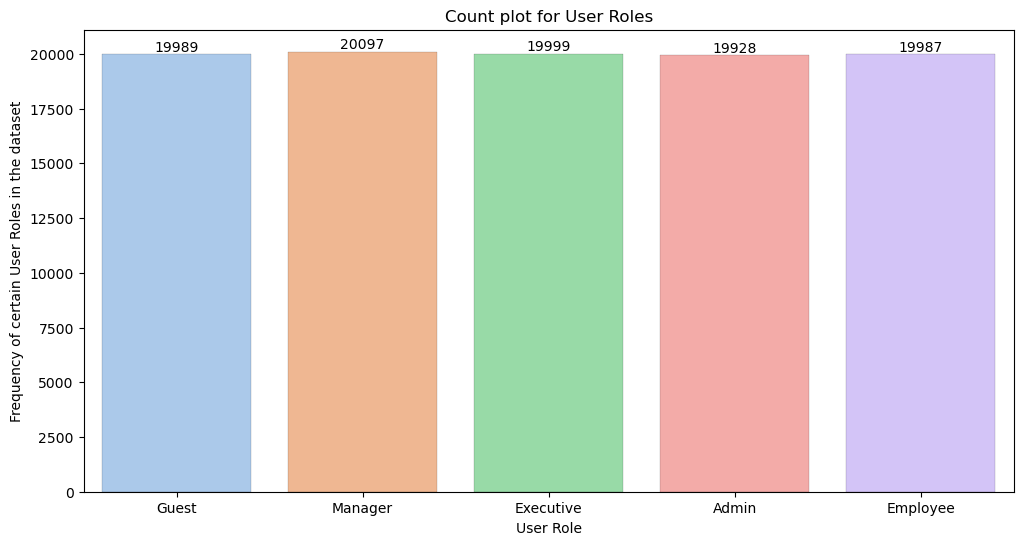

In [31]:
# Setting the figure and axes
fig, ax = plt.subplots(figsize = (12,6))

# Plotting the graph
bars = sns.countplot(x ='User_Role', data = df_context_relevance_data, palette = 'pastel', edgecolor = 'black', linewidth = 0.1)

# Setting the name of x axis
ax.set_xlabel("User Role")

# Setting the name of y axis
ax.set_ylabel("Frequency of certain User Roles in the dataset")

# Setting the title of the graph
ax.set_title("Count plot for User Roles")

# Setting the bar values
for container in bars.containers:
    ax.bar_label(container)

# Displaying the graph
plt.show()

**Interpretation**

- The dataset shows a relatively **balanced distribution** across user roles, with **Manager** being the most frequent at **20,097 entries**.
- **Executive** (19,999), **Guest** (19,989), and **Employee** (19,987) follow closely, suggesting near-uniform representation.
- **Admin** is slightly lower at **19,928 entries**, though still within a small deviation range.
- This uniform distribution is advantageous for modeling, as it **reduces class imbalance bias** when using user roles as features.
- From an analytical perspective, this balance ensures that any trends found are less likely to be driven by disproportionate representation of a specificrole.


#### b. A Count plot for **`User_Department`** column.

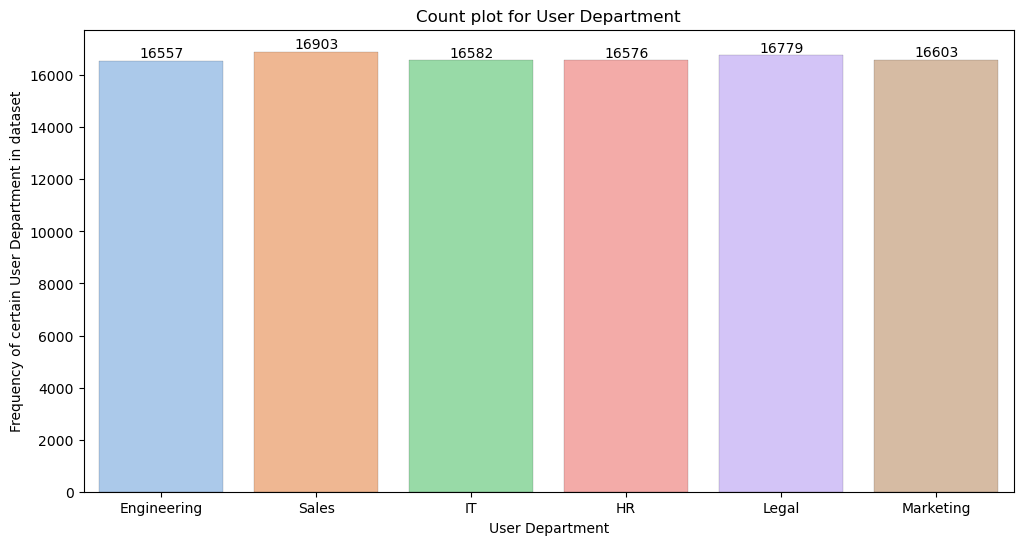

In [32]:
# Setting the figure and axes
fig, ax = plt.subplots(figsize = (12,6))

# Plotting the graph
bars = sns.countplot(x ='User_Department', data = df_context_relevance_data, palette = 'pastel', edgecolor = 'black', linewidth = 0.1)

# Setting the name of x axis
ax.set_xlabel("User Department")

# Setting the name of y axis
ax.set_ylabel("Frequency of certain User Department in dataset")

# Setting the title of the graph
ax.set_title("Count plot for User Department")

# Setting the bar values
for container in bars.containers:
    ax.bar_label(container)

# Displaying the graph
plt.show()

**Interpretation**

- Here also the dataset shows balanced distribution across user departments, with **Sales** being the most frequent at **16903**.
- **Legal** (16779), **Marketing** (16603), **IT** (16582), and **HR** (16576) follow closely, suggesting near-uniform representation.
- **Engineering** is slightly lower at **16557 entries**, though still within a small deviation range.
- This uniform distribution is advantageous for modeling, as it **reduces class imbalance bias** when using user department as features.
- From an analytical perspective, this balance ensures that any trends found are less likely to be driven by disproportionate representation of a specific Department.

#### c. A Count plot for **`Document_Type`** column.

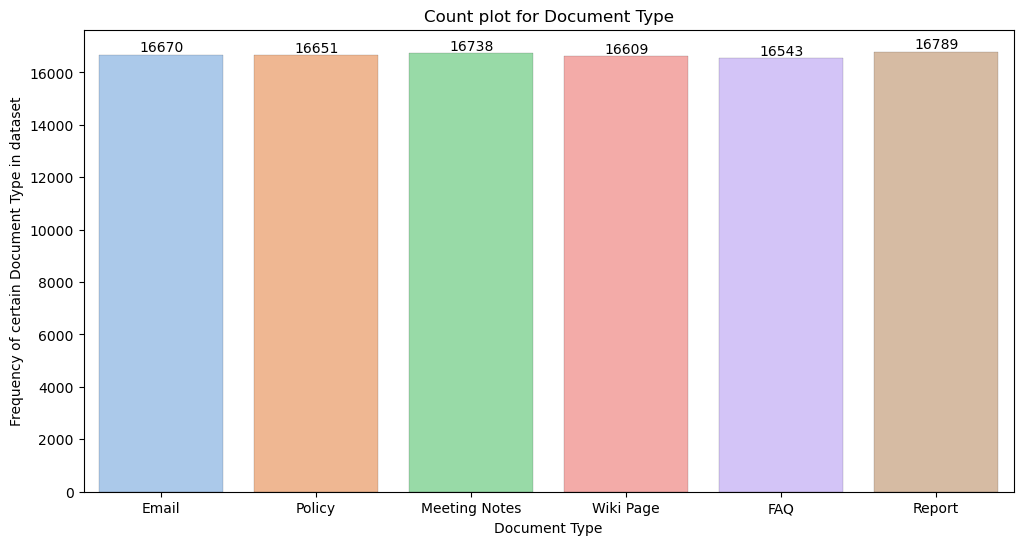

In [33]:
# Setting the figure and axes
fig, ax = plt.subplots(figsize = (12,6))

# Plotting the graph
bars = sns.countplot(x ='Document_Type', data = df_context_relevance_data, palette = 'pastel', edgecolor = 'black', linewidth = 0.1)

# Setting the name of x axis
ax.set_xlabel("Document Type")

# Setting the name of y axis
ax.set_ylabel("Frequency of certain Document Type in dataset")

# Setting the title of the graph
ax.set_title("Count plot for Document Type")

# Setting the bar values
for container in bars.containers:
    ax.bar_label(container)

# Displaying the graph
plt.show()

**Interpretation**

- Here also the dataset shows balanced distribution across Document types, with **Report** being the most frequent at **16789**.
- **Meeting Notes** (16738), **Email** (16670), **Policy** (16651), and **Wiki Page** (16609) follow closely, suggesting near-uniform representation.
- **FAQ** is slightly lower at **16543 entries**, though still within a small deviation range.
- As we know that this uniform distribution is advantageous for modeling, as it **reduces class imbalance bias** when using dccument type as features.
- From an analytical perspective, this balance ensures that any trends found are less likely to be driven by disproportionate representation of a specific Document type.

#### d. A Count plot for **`Document_Department`** column.

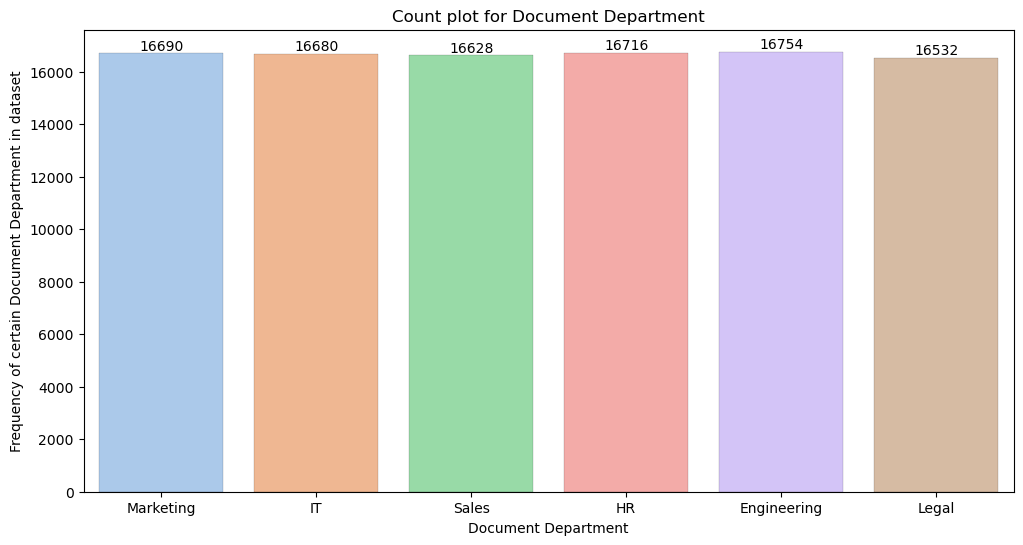

In [34]:
# Setting the figure and axes
fig, ax = plt.subplots(figsize = (12,6))

# Plotting the graph
bars = sns.countplot(x ='Document_Department', data = df_context_relevance_data, palette = 'pastel', edgecolor = 'black', linewidth = 0.1)

# Setting the name of x axis
ax.set_xlabel("Document Department")

# Setting the name of y axis
ax.set_ylabel("Frequency of certain Document Department in dataset")

# Setting the title of the graph
ax.set_title("Count plot for Document Department")

# Setting the bar values
for container in bars.containers:
    ax.bar_label(container)

# Displaying the graph
plt.show()

**Interpretation**

- Here also the dataset shows balanced distribution across user departments, with **Engineering** being the most frequent at **16754**.
- **HR** (16716), **Marketing** (16690), **IT** (16680), and **Sales** (16628) follow closely, suggesting near-uniform representation.
- **Legal** is slightly lower at **16532 entries**, though still within a small deviation range.
- This uniform distribution is advantageous for modeling, as it **reduces class imbalance bias** when using user department as features.
- From an analytical perspective, this balance ensures that any trends found are less likely to be driven by disproportionate representation of a specific Department.

#### e. A Count plot for **`Author_Role`** column.

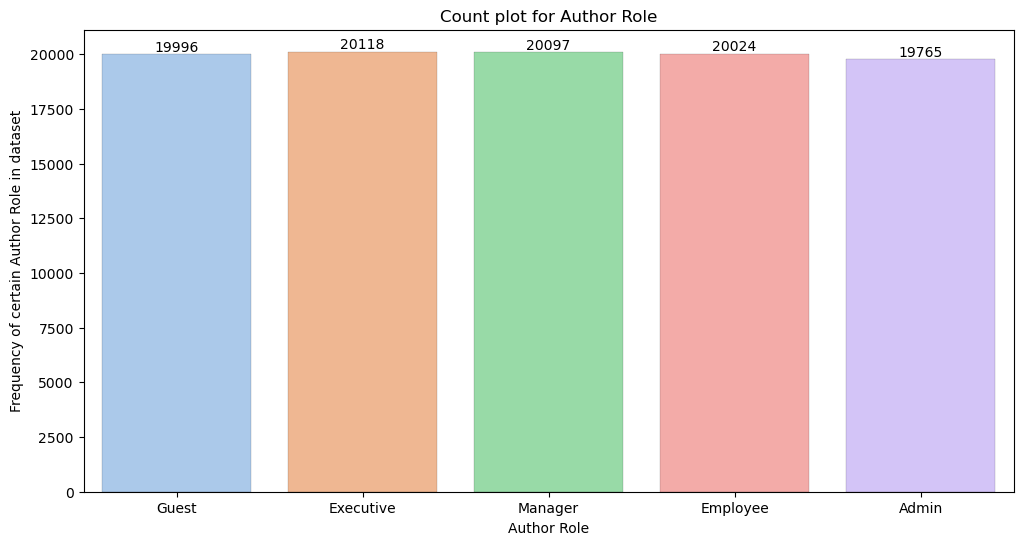

In [35]:
# Setting the figure and axes
fig, ax = plt.subplots(figsize = (12,6))

# Plotting the graph
bars = sns.countplot(x ='Author_Role', data = df_context_relevance_data, palette = 'pastel', edgecolor = 'black', linewidth = 0.1)

# Setting the name of x axis
ax.set_xlabel("Author Role")

# Setting the name of y axis
ax.set_ylabel("Frequency of certain Author Role in dataset")

# Setting the title of the graph
ax.set_title("Count plot for Author Role")

# Setting the bar values
for container in bars.containers:
    ax.bar_label(container)

# Displaying the graph
plt.show()

**Interpretation**

- Here also the dataset shows balanced distribution across user departments, with **Executive** being the most frequent at **20118**.
- **Manager** (20097), **Employee** (20024) and **Guest** (19996) follow closely, suggesting near-uniform representation.
- **Admin** is slightly lower at **19765 entries**, though still within a small deviation range.
- This uniform distribution is advantageous for modeling, as it **reduces class imbalance bias** when using Author Role as features.
- From an analytical perspective, this balance ensures that any trends found are less likely to be driven by disproportionate representation of a specific Role.

#### f. A Count plot for **`Language`** column.

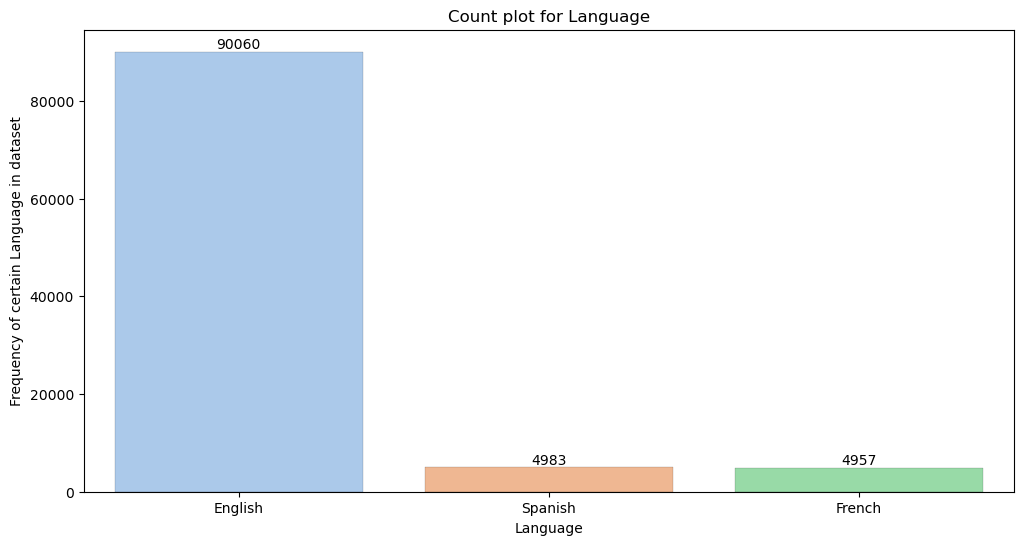

In [36]:
# Setting the figure and axes
fig, ax = plt.subplots(figsize = (12,6))

# Plotting the graph
bars = sns.countplot(x ='Language', data = df_context_relevance_data, palette = 'pastel', edgecolor = 'black', linewidth = 0.1)

# Setting the name of x axis
ax.set_xlabel("Language")

# Setting the name of y axis
ax.set_ylabel("Frequency of certain Language in dataset")

# Setting the title of the graph
ax.set_title("Count plot for Language")

# Setting the bar values
for container in bars.containers:
    ax.bar_label(container)

# Displaying the graph
plt.show()

**Interpretation**

- Here we can see that most of our records are filled with **English** language query texts, i.e. around **90060**.
- **Spanish** and **French** has number of records near to each other **4983** and **4957** respectively.
- This tells us that mostly the queries are written in English, and there are less other language using users are there.

### 2. Numerical columns

#### a. A Histogram for **`Product_Price`** column.

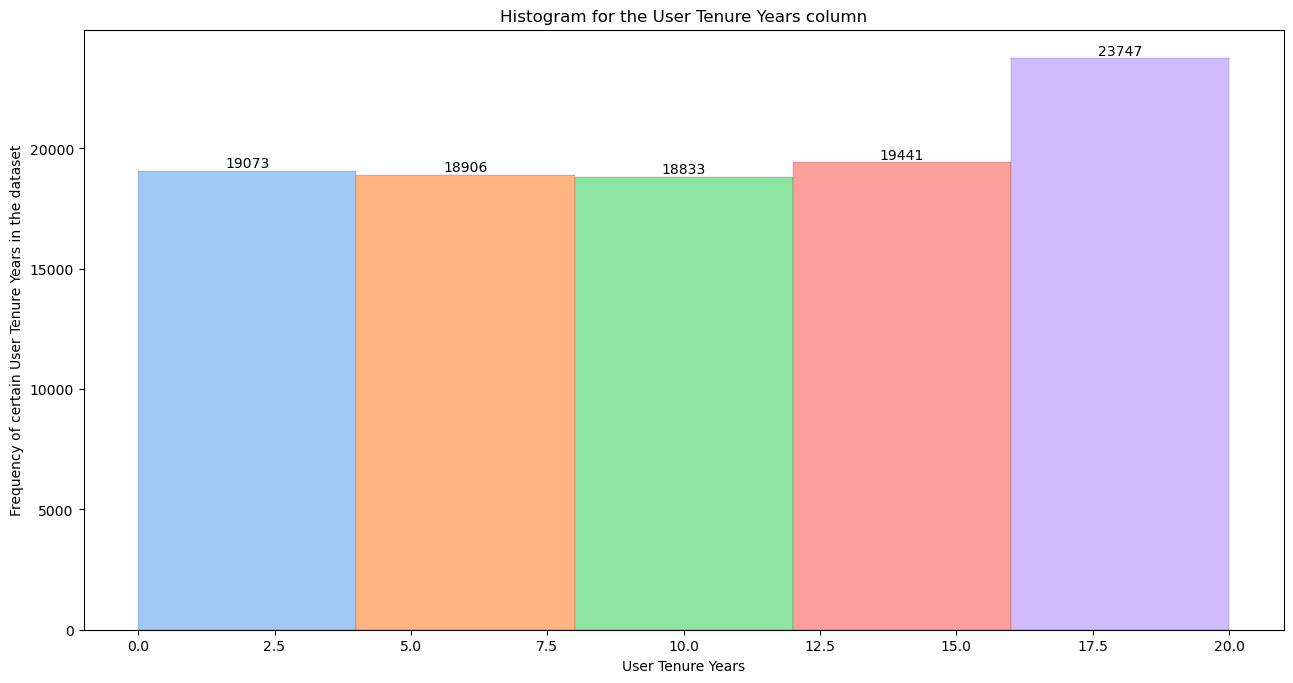

In [37]:
# Setting figure for the graph
fig = plt.figure(figsize = (12,6))

# Setting axes for the graph
ax = fig.add_axes([0,0,1,1])

# Dividing the pastel color palette into 5 colors
cm = sns.color_palette("pastel", 5)

# Plotting the graph
bars = sns.histplot(x = "User_Tenure_Years", data = df_context_relevance_data, bins = 5, edgecolor = 'black', linewidth = 0.1)

# Coloring the bars
for bin, i in zip(bars.patches, cm):
    bin.set_facecolor(i)

# Setting the name of x axis
ax.set_xlabel("User Tenure Years")

# Setting the name of y axis
ax.set_ylabel("Frequency of certain User Tenure Years in the dataset")

# Setting the title for the graph
ax.set_title("Histogram for the User Tenure Years column")

# Setting the bar values
for container in bars.containers:
    ax.bar_label(container)

# Displaying the graph
plt.show()

**Interpretation**

- We can see that for most of the records (i.e. **23747**) the **Tenure Years** are between **15.5** to **20.0** years.
- Second most records (i.e. **19441**) have the **Tenure Years** between **12.0** to **16.00** years.
- In rest of the records the tenure years lies between **0.0** to **11.7** years.

#### b. A Histogram for **`Query_Length`** column.

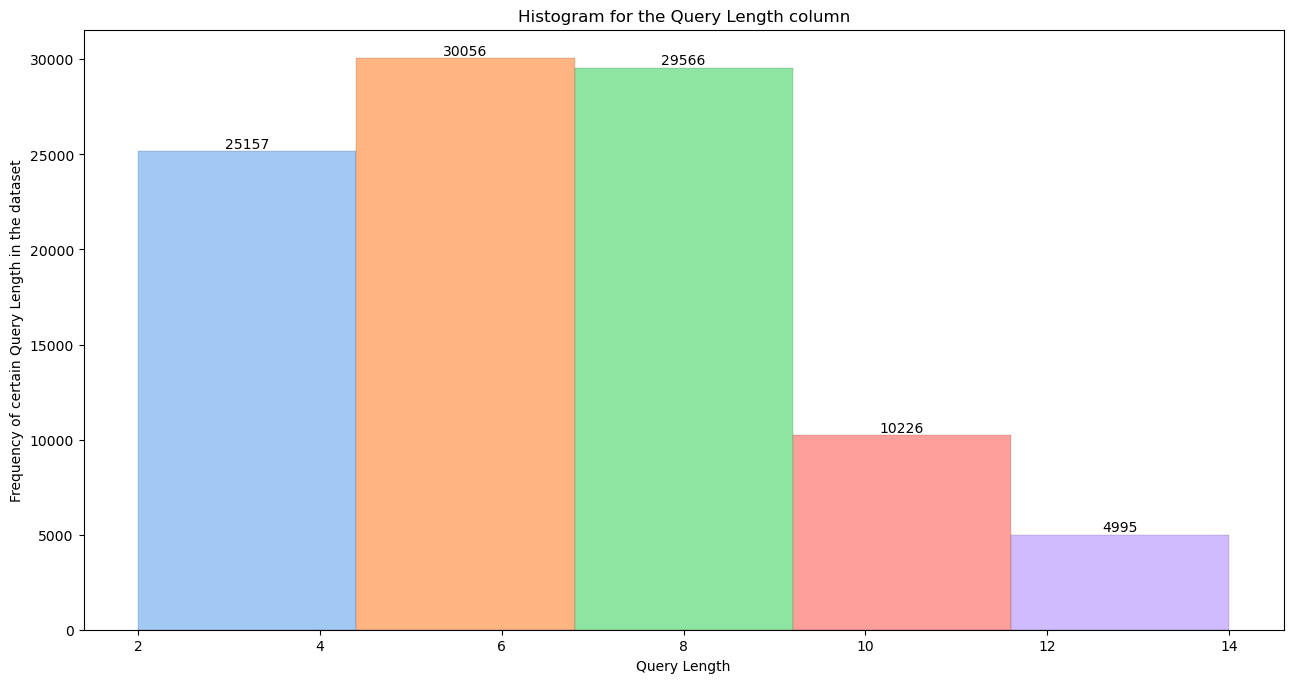

In [38]:
# Setting figure for the graph
fig = plt.figure(figsize = (12,6))

# Setting axes for the graph
ax = fig.add_axes([0,0,1,1])

# Dividing the pastel color palette into 5 colors
cm = sns.color_palette("pastel", 5)

# Plotting the graph
bars = sns.histplot(x = "Query_Length", data = df_context_relevance_data, bins = 5, edgecolor = 'black', linewidth = 0.1)

# Coloring the bars
for bin, i in zip(bars.patches, cm):
    bin.set_facecolor(i)

# Setting the name of x axis
ax.set_xlabel("Query Length")

# Setting the name of y axis
ax.set_ylabel("Frequency of certain Query Length in the dataset")

# Setting the title for the graph
ax.set_title("Histogram for the Query Length column")

# Setting the bar values
for container in bars.containers:
    ax.bar_label(container)

# Displaying the graph
plt.show()

**Interpretation**

- Here we can see that for most of the records (i.e **30056**) query length is between **4.3** to **6.7** words.
- For second most records (i.e. **29566**) query length is between **6.7** to **9.4** words.
- Similarly third most records (i.e. **25157**) has length between **2** to **4.2** words, Second least records (i.e. **10226**) has length **9.4** to **11.8** and least number of records (i.e. **4995**) has Query length between **11.8** to **14** words.
- From this we can say that most of ther users **writes small length to medium length queries**, and very less users right **Long detailed queries**.
- Which also tells us that most of the users might not be **much skilled** in the **prompting**.

#### c. A Histogram for **`Context_Length`** column.

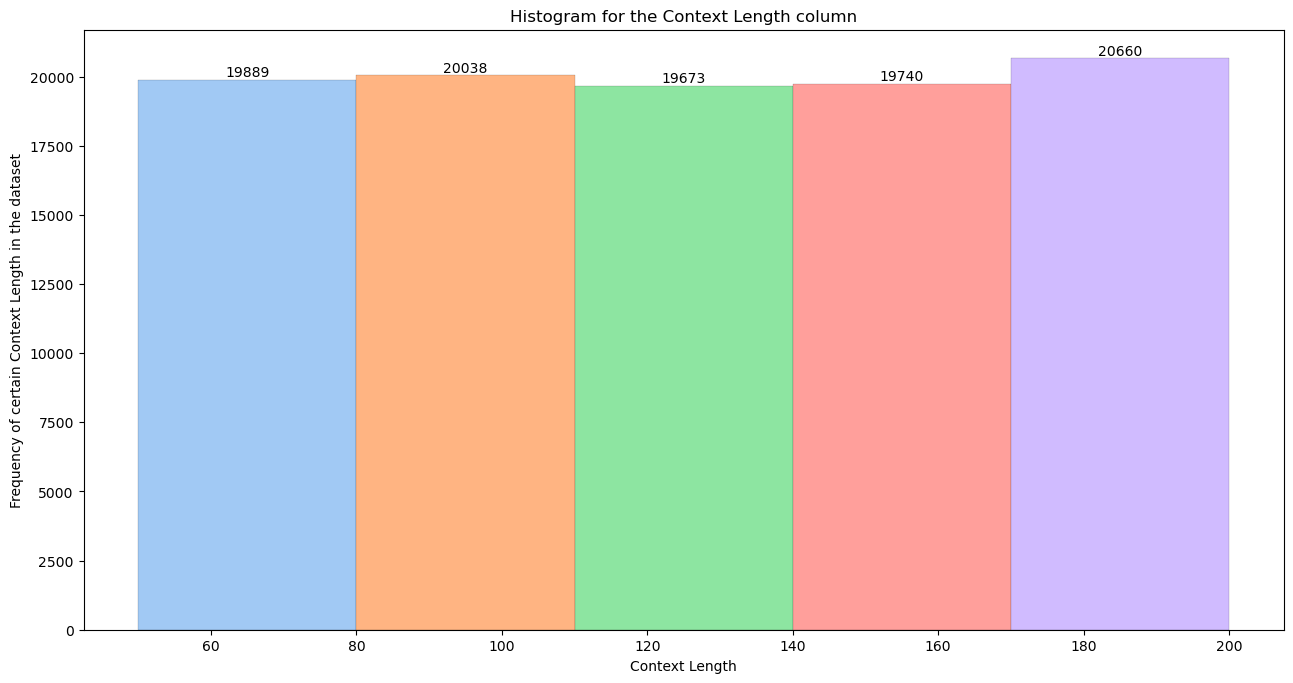

In [39]:
# Setting figure for the graph
fig = plt.figure(figsize = (12,6))

# Setting axes for the graph
ax = fig.add_axes([0,0,1,1])

# Dividing the pastel color palette into 5 colors
cm = sns.color_palette("pastel", 5)

# Plotting the graph
bars = sns.histplot(x = "Context_Length", data = df_context_relevance_data, bins = 5, edgecolor = 'black', linewidth = 0.1)

# Coloring the bars
for bin, i in zip(bars.patches, cm):
    bin.set_facecolor(i)

# Setting the name of x axis
ax.set_xlabel("Context Length")

# Setting the name of y axis
ax.set_ylabel("Frequency of certain Context Length in the dataset")

# Setting the title for the graph
ax.set_title("Histogram for the Context Length column")

# Setting the bar values
for container in bars.containers:
    ax.bar_label(container)

# Displaying the graph
plt.show()

**Interpretation**

- We can see that different length of Context lengths have near equal number of records in the dataset.
- Still Context Length between **170** to **200** is the most occurred (i.e. **20660** times) context length in the dataset records.
- From this we can say that we have variety of context lengths in our dataset.

#### d. A Histogram for **`Version_Number`** column.

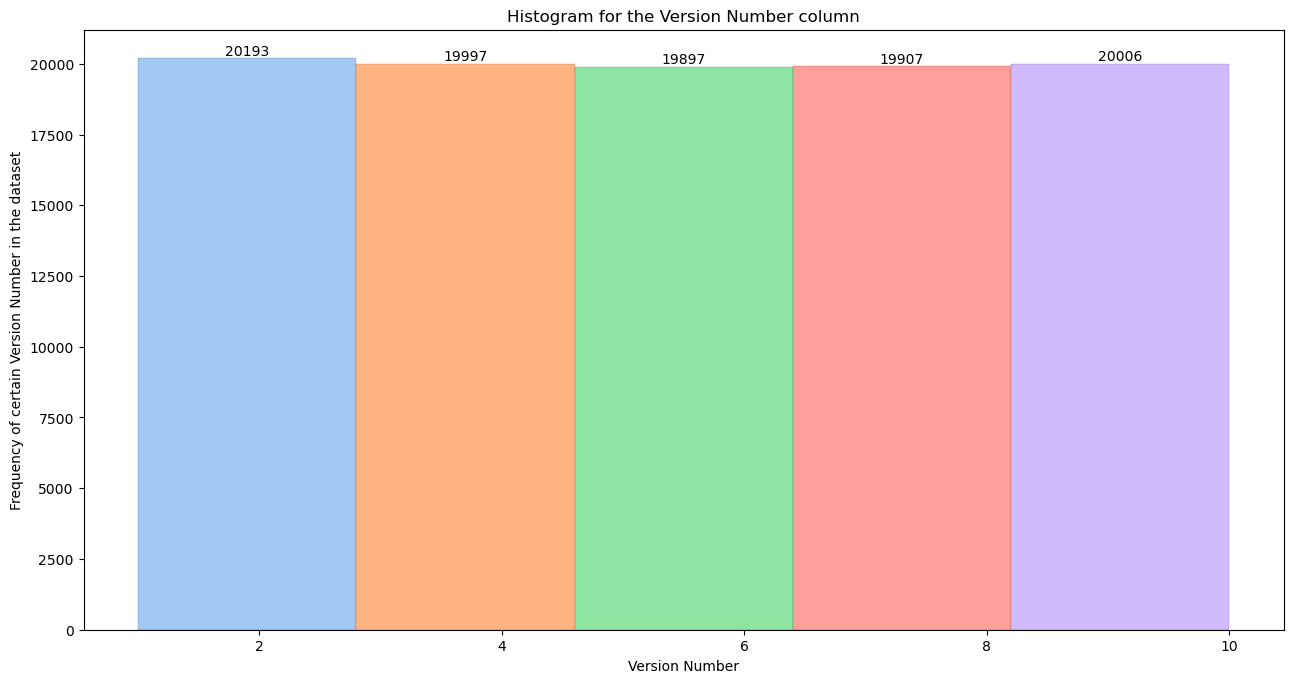

In [40]:
# Setting figure for the graph
fig = plt.figure(figsize = (12,6))

# Setting axes for the graph
ax = fig.add_axes([0,0,1,1])

# Dividing the pastel color palette into 5 colors
cm = sns.color_palette("pastel", 5)

# Plotting the graph
bars = sns.histplot(x = "Version_Number", data = df_context_relevance_data, bins = 5, edgecolor = 'black', linewidth = 0.1)

# Coloring the bars
for bin, i in zip(bars.patches, cm):
    bin.set_facecolor(i)

# Setting the name of x axis
ax.set_xlabel("Version Number")

# Setting the name of y axis
ax.set_ylabel("Frequency of certain Version Number in the dataset")

# Setting the title for the graph
ax.set_title("Histogram for the Version Number column")

# Setting the bar values
for container in bars.containers:
    ax.bar_label(container)

# Displaying the graph
plt.show()

**Interpretation**

- Here also we can see that there is no much **difference** in the **version number** of the **context items**.
- From this we can say that we have equal number of records for each **version number** of different **context items**.

#### e. A Histogram for **`Cosine_Similarity`** column.

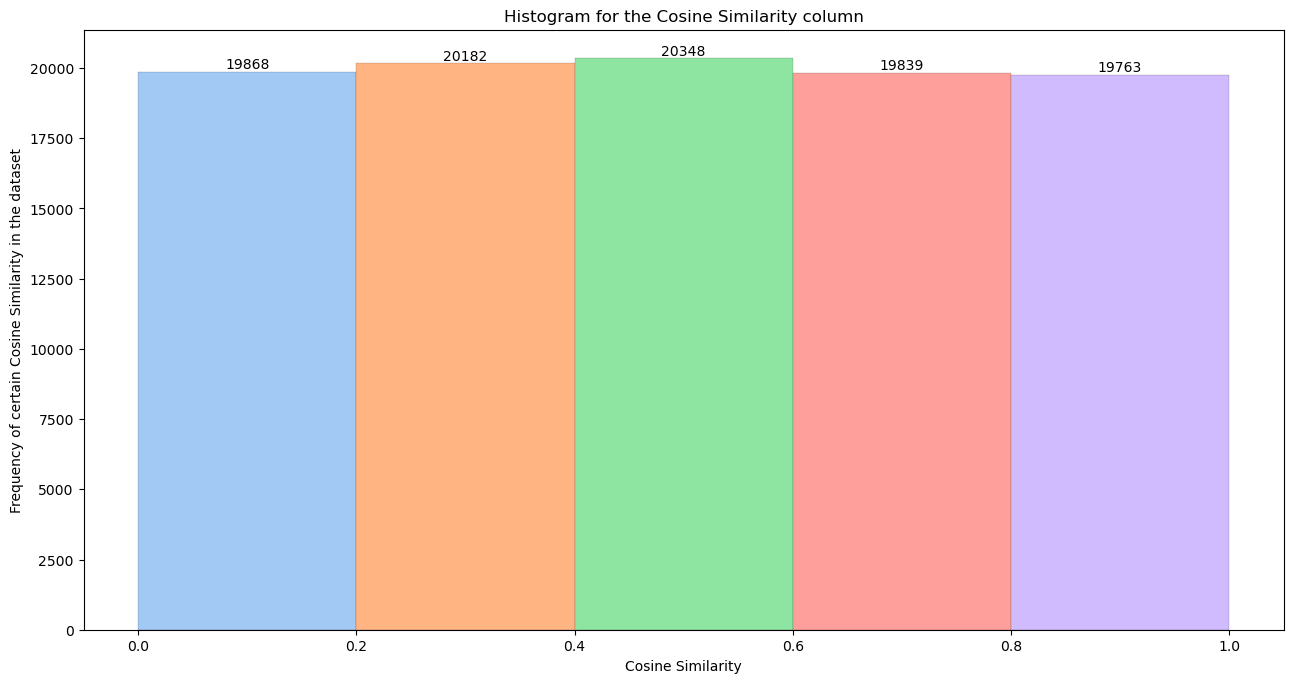

In [41]:
# Setting figure for the graph
fig = plt.figure(figsize = (12,6))

# Setting axes for the graph
ax = fig.add_axes([0,0,1,1])

# Dividing the pastel color palette into 5 colors
cm = sns.color_palette("pastel", 5)

# Plotting the graph
bars = sns.histplot(x = "Cosine_Similarity", data = df_context_relevance_data, bins = 5, edgecolor = 'black', linewidth = 0.1)

# Coloring the bars
for bin, i in zip(bars.patches, cm):
    bin.set_facecolor(i)

# Setting the name of x axis
ax.set_xlabel("Cosine Similarity")

# Setting the name of y axis
ax.set_ylabel("Frequency of certain Cosine Similarity in the dataset")

# Setting the title for the graph
ax.set_title("Histogram for the Cosine Similarity column")

# Setting the bar values
for container in bars.containers:
    ax.bar_label(container)

# Displaying the graph
plt.show()

**Interpretation**

- Here also we can see that we have **good variety** of cosine similarities present in the dataset.
- Meaning our dataset consist of good variety of Similarities in the records that would be good for our model to be trained on.

#### f. A Histogram for **`TFIDF_Score`** column.

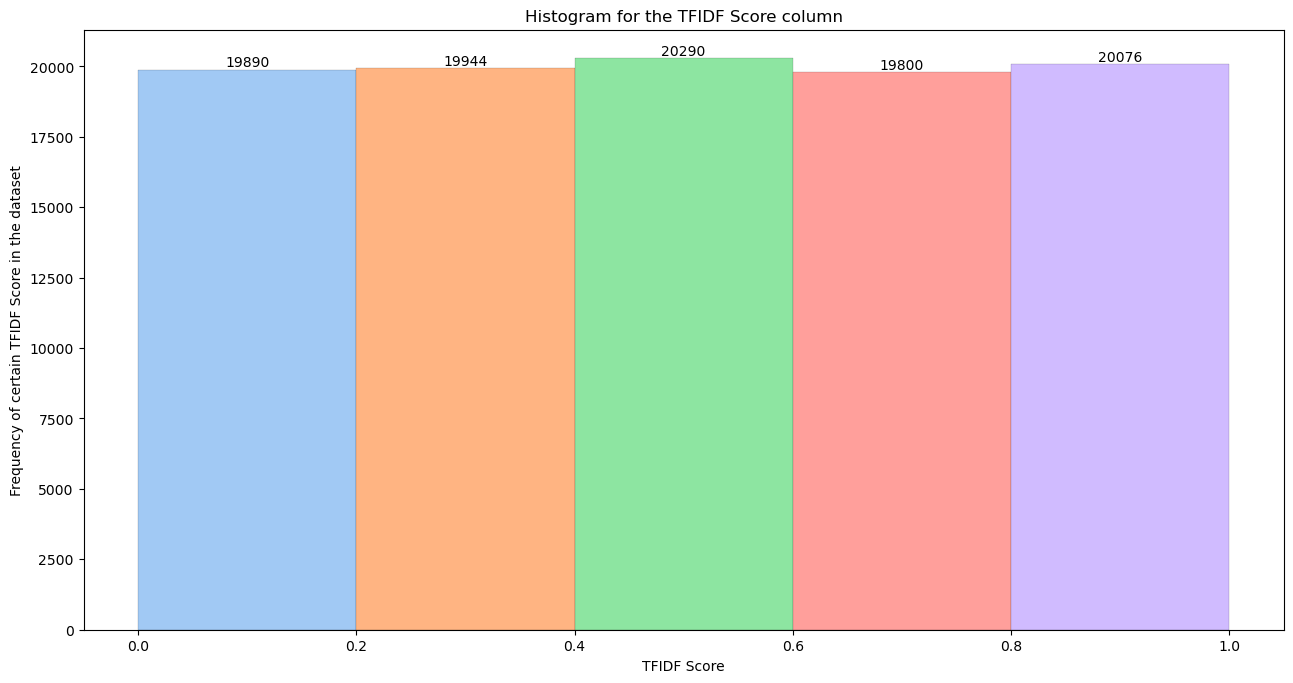

In [42]:
# Setting figure for the graph
fig = plt.figure(figsize = (12,6))

# Setting axes for the graph
ax = fig.add_axes([0,0,1,1])

# Dividing the pastel color palette into 5 colors
cm = sns.color_palette("pastel", 5)

# Plotting the graph
bars = sns.histplot(x = "TFIDF_Score", data = df_context_relevance_data, bins = 5, edgecolor = 'black', linewidth = 0.1)

# Coloring the bars
for bin, i in zip(bars.patches, cm):
    bin.set_facecolor(i)

# Setting the name of x axis
ax.set_xlabel("TFIDF Score")

# Setting the name of y axis
ax.set_ylabel("Frequency of certain TFIDF Score in the dataset")

# Setting the title for the graph
ax.set_title("Histogram for the TFIDF Score column")

# Setting the bar values
for container in bars.containers:
    ax.bar_label(container)

# Displaying the graph
plt.show()

**Interpretation**

- Here also, we have a good variety of TFIDF scores in our records in this dataset.
- Which means that variation of TFIDF scores in near equal number of records of our dataset, which is **good** for our model training.

#### g. A Histogram for **`Keyword_Overlap_Count`** column.

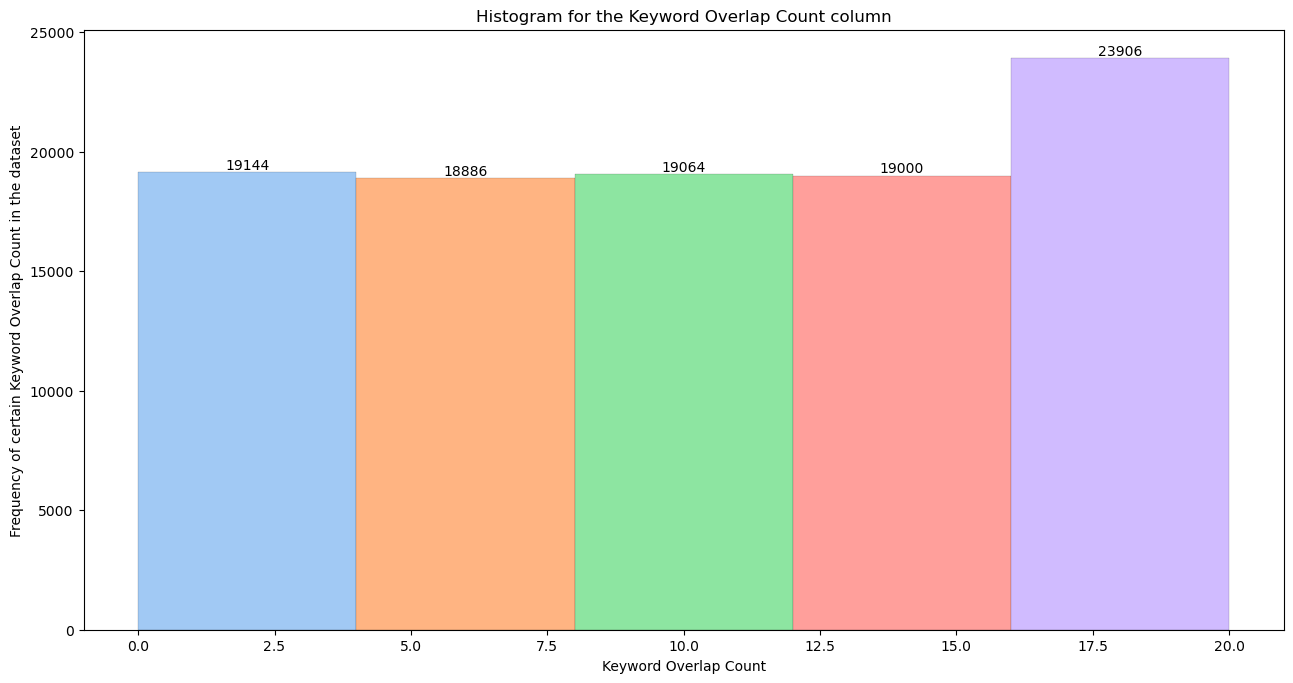

In [43]:
# Setting figure for the graph
fig = plt.figure(figsize = (12,6))

# Setting axes for the graph
ax = fig.add_axes([0,0,1,1])

# Dividing the pastel color palette into 5 colors
cm = sns.color_palette("pastel", 5)

# Plotting the graph
bars = sns.histplot(x = "Keyword_Overlap_Count", data = df_context_relevance_data, bins = 5, edgecolor = 'black', linewidth = 0.1)

# Coloring the bars
for bin, i in zip(bars.patches, cm):
    bin.set_facecolor(i)

# Setting the name of x axis
ax.set_xlabel("Keyword Overlap Count")

# Setting the name of y axis
ax.set_ylabel("Frequency of certain Keyword Overlap Count in the dataset")

# Setting the title for the graph
ax.set_title("Histogram for the Keyword Overlap Count column")

# Setting the bar values
for container in bars.containers:
    ax.bar_label(container)

# Displaying the graph
plt.show()

**Interpretation**

- Here we can see a good number of records (i.e. **23906**) have around **16** to **20.0** keywords which overlap in **Query text** and **Context text**.
- And for rest of the records we have near equal number of records for different **Keyword Overlap Counts**.

#### h. A Histogram for **`BERT_Similarity`** column.

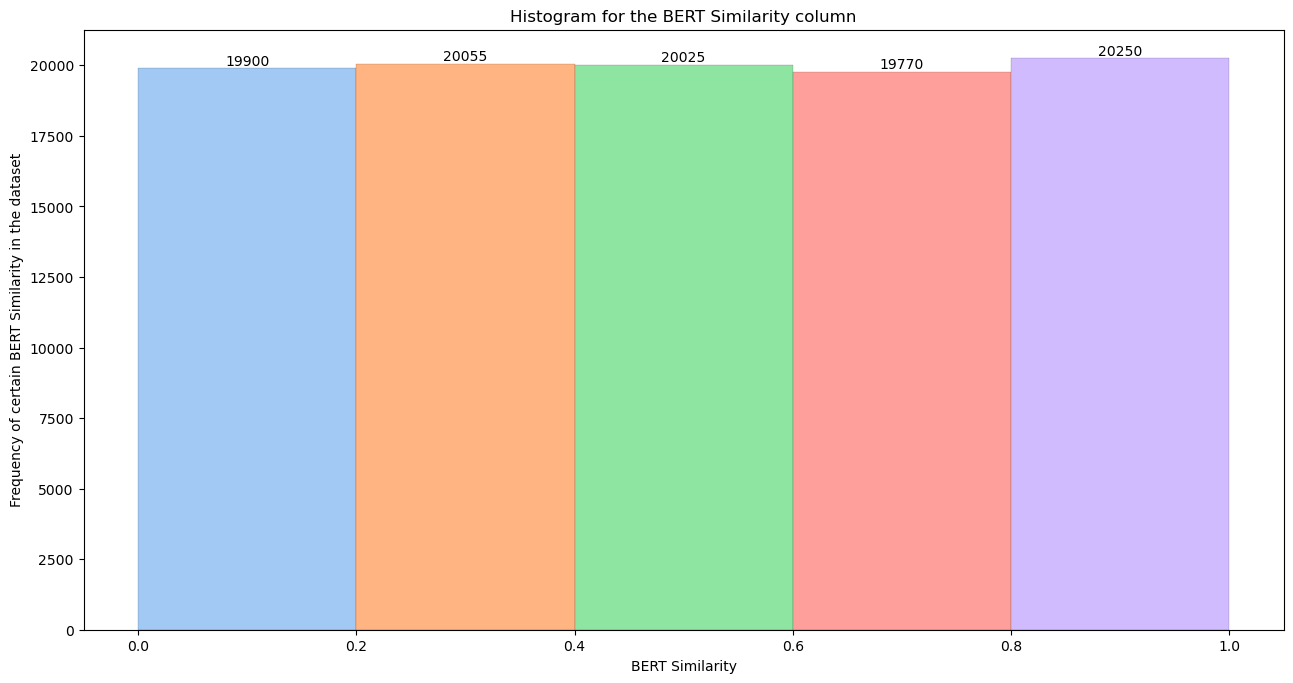

In [44]:
# Setting figure for the graph
fig = plt.figure(figsize = (12,6))

# Setting axes for the graph
ax = fig.add_axes([0,0,1,1])

# Dividing the pastel color palette into 5 colors
cm = sns.color_palette("pastel", 5)

# Plotting the graph
bars = sns.histplot(x = "BERT_Similarity", data = df_context_relevance_data, bins = 5, edgecolor = 'black', linewidth = 0.1)

# Coloring the bars
for bin, i in zip(bars.patches, cm):
    bin.set_facecolor(i)

# Setting the name of x axis
ax.set_xlabel("BERT Similarity")

# Setting the name of y axis
ax.set_ylabel("Frequency of certain BERT Similarity in the dataset")

# Setting the title for the graph
ax.set_title("Histogram for the BERT Similarity column")

# Setting the bar values
for container in bars.containers:
    ax.bar_label(container)

# Displaying the graph
plt.show()

**Interpretation**

- From this graph we can say that we don't have our dataset field with only one kind of **BERT similarity**, we have near equal number of records for each level of BERT similarity.
- Which is good for training our model.

#### i. A Histogram for **`Readability_Score`** column.

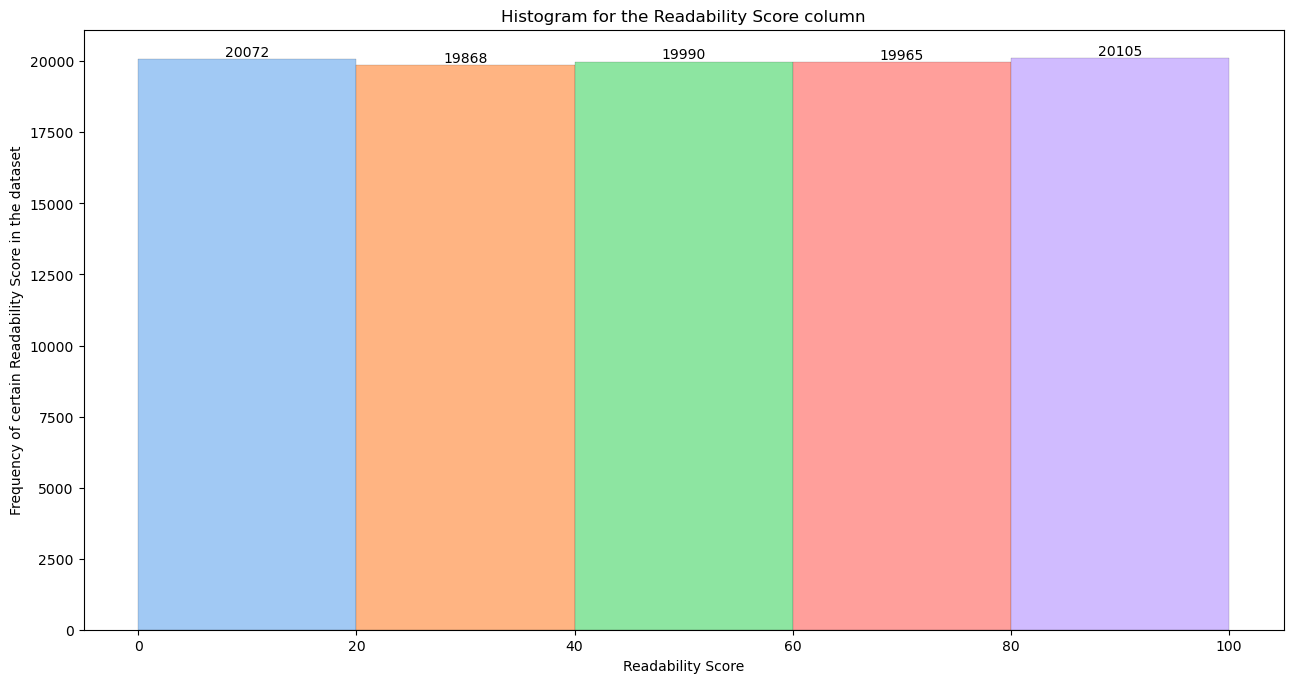

In [45]:
# Setting figure for the graph
fig = plt.figure(figsize = (12,6))

# Setting axes for the graph
ax = fig.add_axes([0,0,1,1])

# Dividing the pastel color palette into 5 colors
cm = sns.color_palette("pastel", 5)

# Plotting the graph
bars = sns.histplot(x = "Readability_Score", data = df_context_relevance_data, bins = 5, edgecolor = 'black', linewidth = 0.1)

# Coloring the bars
for bin, i in zip(bars.patches, cm):
    bin.set_facecolor(i)

# Setting the name of x axis
ax.set_xlabel("Readability Score")

# Setting the name of y axis
ax.set_ylabel("Frequency of certain Readability Score in the dataset")

# Setting the title for the graph
ax.set_title("Histogram for the Readability Score column")

# Setting the bar values
for container in bars.containers:
    ax.bar_label(container)

# Displaying the graph
plt.show()

**Interpretation**

- From this we can say that we have records with very good variability meaning, we have near equal number of records for all the kinds of readeability scores.

#### j. A Histogram for **`View_Count`** column.

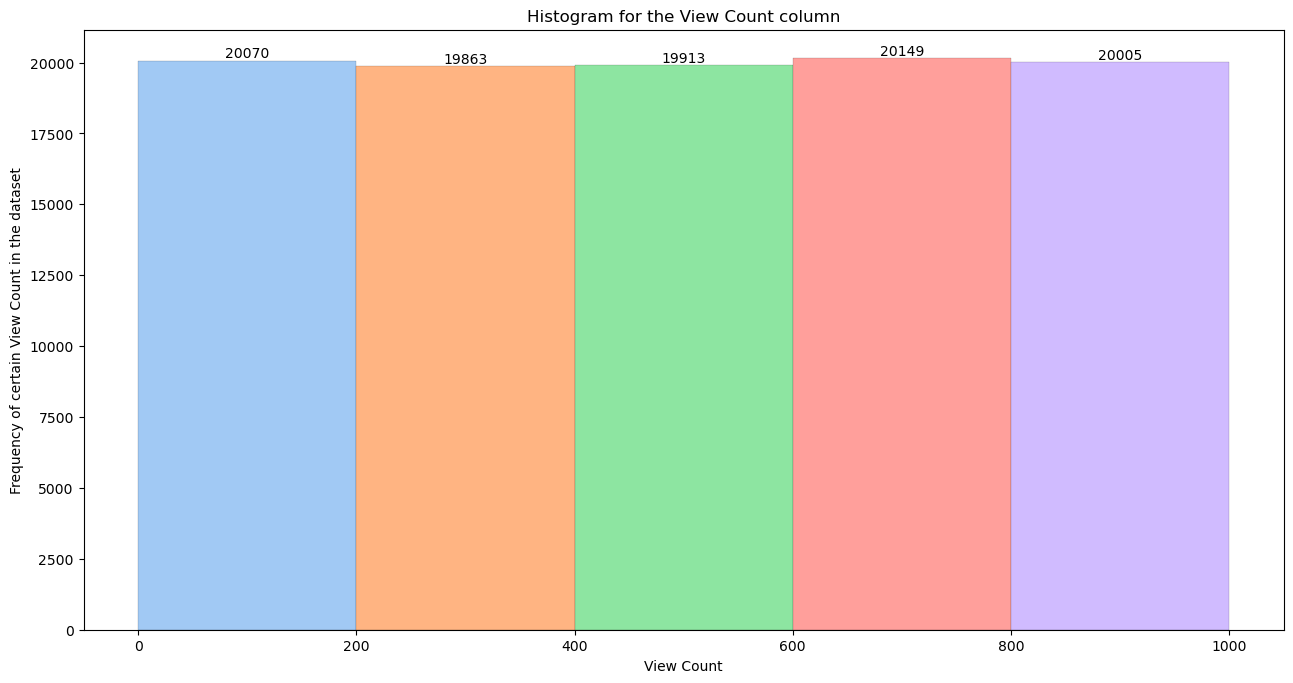

In [46]:
# Setting figure for the graph
fig = plt.figure(figsize = (12,6))

# Setting axes for the graph
ax = fig.add_axes([0,0,1,1])

# Dividing the pastel color palette into 5 colors
cm = sns.color_palette("pastel", 5)

# Plotting the graph
bars = sns.histplot(x = "View_Count", data = df_context_relevance_data, bins = 5, edgecolor = 'black', linewidth = 0.1)

# Coloring the bars
for bin, i in zip(bars.patches, cm):
    bin.set_facecolor(i)

# Setting the name of x axis
ax.set_xlabel("View Count")

# Setting the name of y axis
ax.set_ylabel("Frequency of certain View Count in the dataset")

# Setting the title for the graph
ax.set_title("Histogram for the View Count column")

# Setting the bar values
for container in bars.containers:
    ax.bar_label(container)

# Displaying the graph
plt.show()

**Interpretation**

- Here also we have near equal number of records for all kind of View Counts.

#### k. A Histogram for **`Edit_Count`** column.

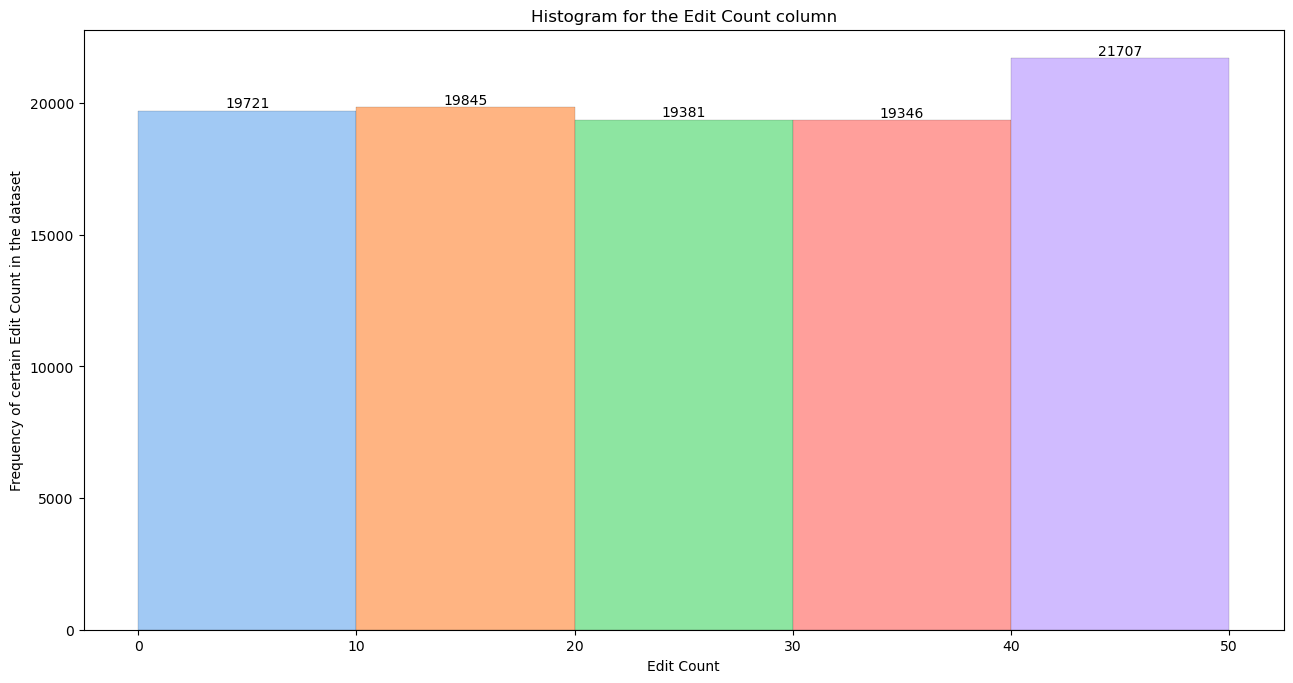

In [47]:
# Setting figure for the graph
fig = plt.figure(figsize = (12,6))

# Setting axes for the graph
ax = fig.add_axes([0,0,1,1])

# Dividing the pastel color palette into 5 colors
cm = sns.color_palette("pastel", 5)

# Plotting the graph
bars = sns.histplot(x = "Edit_Count", data = df_context_relevance_data, bins = 5, edgecolor = 'black', linewidth = 0.1)

# Coloring the bars
for bin, i in zip(bars.patches, cm):
    bin.set_facecolor(i)

# Setting the name of x axis
ax.set_xlabel("Edit Count")

# Setting the name of y axis
ax.set_ylabel("Frequency of certain Edit Count in the dataset")

# Setting the title for the graph
ax.set_title("Histogram for the Edit Count column")

# Setting the bar values
for container in bars.containers:
    ax.bar_label(container)

# Displaying the graph
plt.show()

**Interpretation**

- Here also we can see that we have near equal number of records for all kind of Edit Counts, we have just a bit higher number of records (i.e. **21707**) for Edit counts ranging between **40** to **50**

#### l. A Histogram for **`Click_Count`** column.

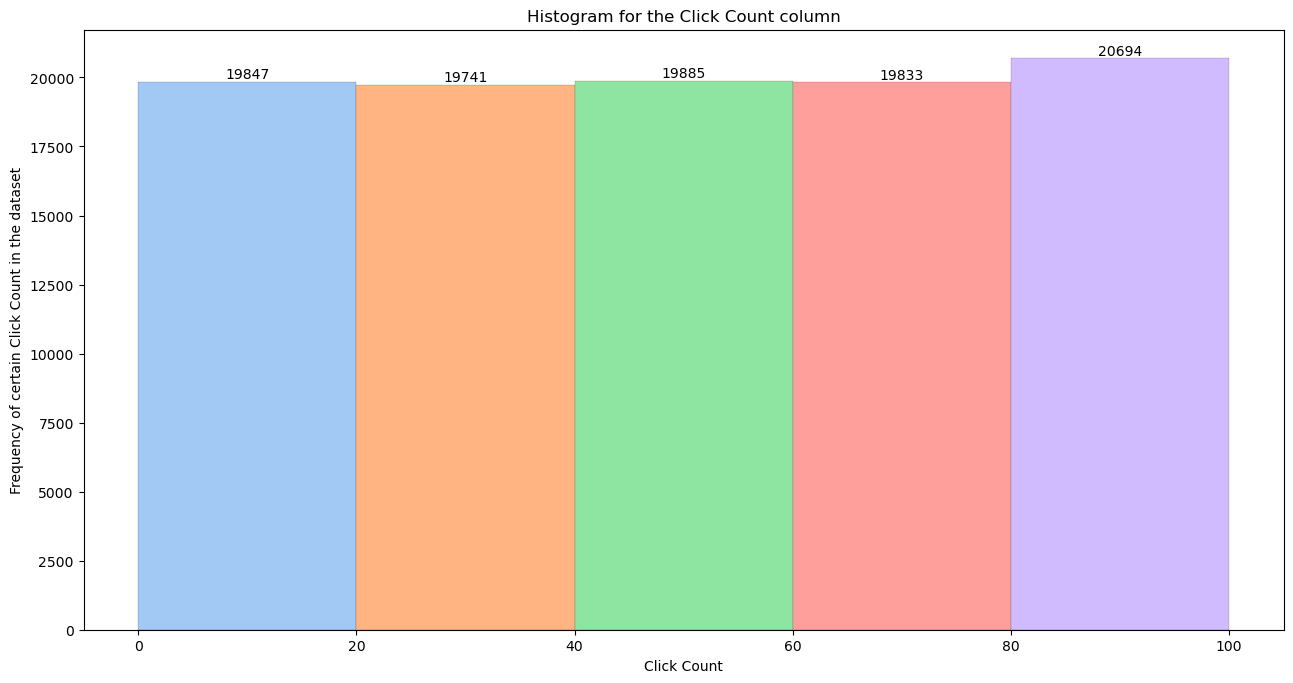

In [48]:
# Setting figure for the graph
fig = plt.figure(figsize = (12,6))

# Setting axes for the graph
ax = fig.add_axes([0,0,1,1])

# Dividing the pastel color palette into 5 colors
cm = sns.color_palette("pastel", 5)

# Plotting the graph
bars = sns.histplot(x = "Click_Count", data = df_context_relevance_data, bins = 5, edgecolor = 'black', linewidth = 0.1)

# Coloring the bars
for bin, i in zip(bars.patches, cm):
    bin.set_facecolor(i)

# Setting the name of x axis
ax.set_xlabel("Click Count")

# Setting the name of y axis
ax.set_ylabel("Frequency of certain Click Count in the dataset")

# Setting the title for the graph
ax.set_title("Histogram for the Click Count column")

# Setting the bar values
for container in bars.containers:
    ax.bar_label(container)

# Displaying the graph
plt.show()

**Interpretation**

- Here also we have near equal number of records for each kind of Click counts, and also we have a slightly higher number of records of click counts between **80** to **100**.

#### m. A Histogram for **`Historical_Relevance_Avg`** column.

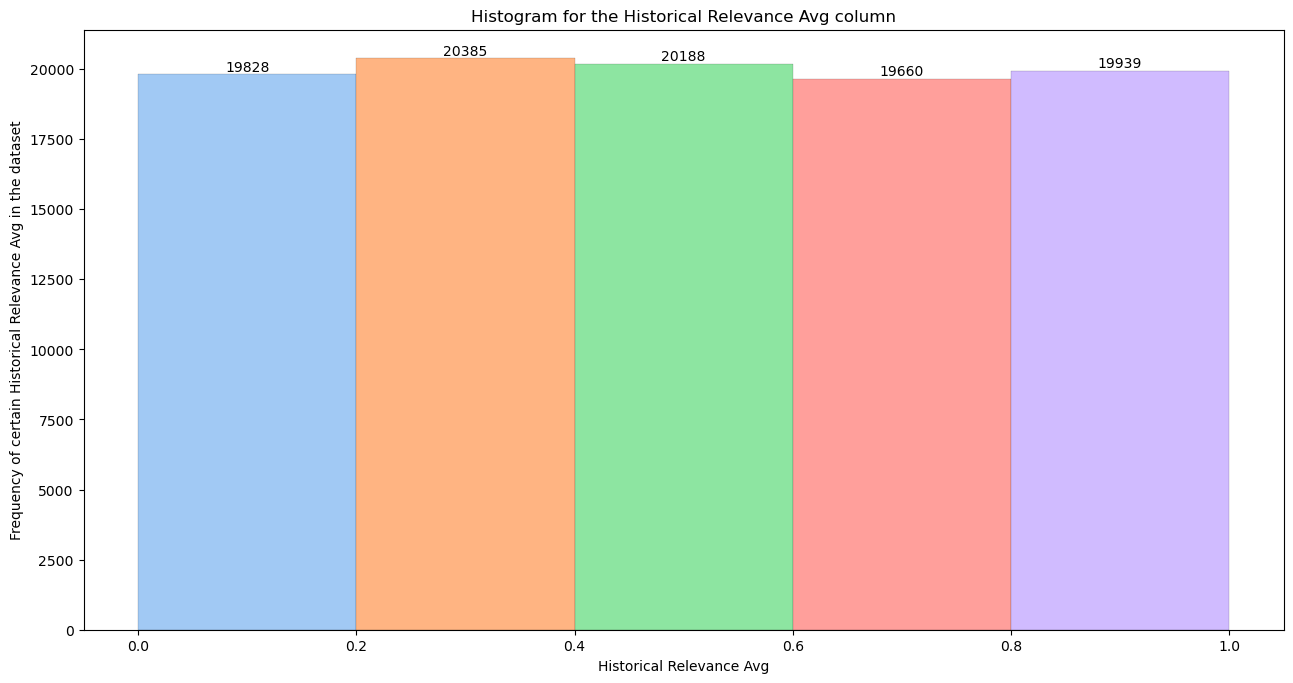

In [49]:
# Setting figure for the graph
fig = plt.figure(figsize = (12,6))

# Setting axes for the graph
ax = fig.add_axes([0,0,1,1])

# Dividing the pastel color palette into 5 colors
cm = sns.color_palette("pastel", 5)

# Plotting the graph
bars = sns.histplot(x = "Historical_Relevance_Avg", data = df_context_relevance_data, bins = 5, edgecolor = 'black', linewidth = 0.1)

# Coloring the bars
for bin, i in zip(bars.patches, cm):
    bin.set_facecolor(i)

# Setting the name of x axis
ax.set_xlabel("Historical Relevance Avg")

# Setting the name of y axis
ax.set_ylabel("Frequency of certain Historical Relevance Avg in the dataset")

# Setting the title for the graph
ax.set_title("Histogram for the Historical Relevance Avg column")

# Setting the bar values
for container in bars.containers:
    ax.bar_label(container)

# Displaying the graph
plt.show()

**Interpretation**

- Here also we have near equal number of records for each kind of Historical Relevance Avg, which gives our dataset good and generic variation for ML training.

#### n. A Count Plot for **`Is_Multi_Turn`** column.

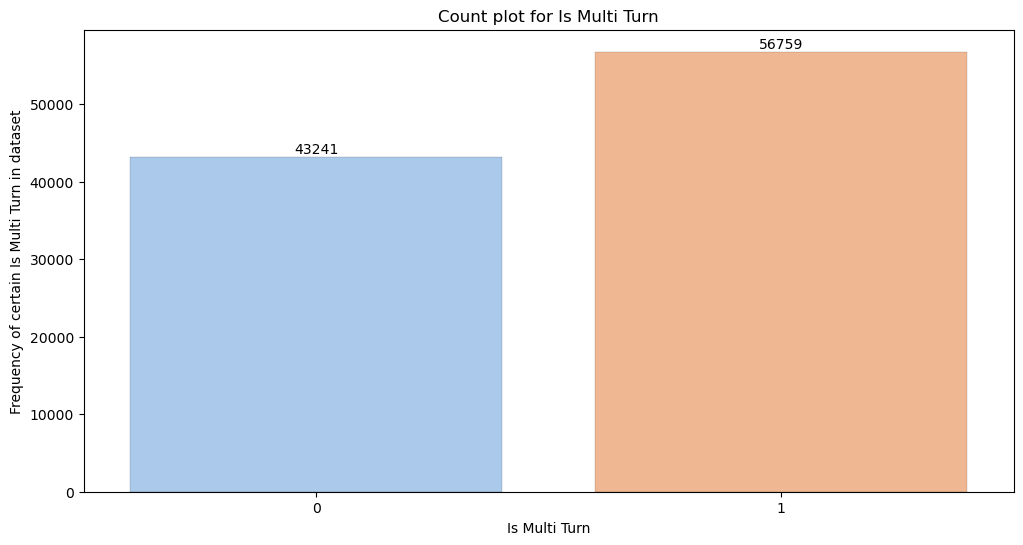

In [50]:
# Setting the figure and axes
fig, ax = plt.subplots(figsize = (12,6))

# Plotting the graph
bars = sns.countplot(x ='Is_Multi_Turn', data = df_context_relevance_data, palette = 'pastel', edgecolor = 'black', linewidth = 0.1)

# Setting the name of x axis
ax.set_xlabel("Is Multi Turn")

# Setting the name of y axis
ax.set_ylabel("Frequency of certain Is Multi Turn in dataset")

# Setting the title of the graph
ax.set_title("Count plot for Is Multi Turn")

# Setting the bar values
for container in bars.containers:
    ax.bar_label(container)

# Displaying the graph
plt.show()

**Interpretation**

- Here we have more records where we have Multi Turn. Meaning more queries are part of a multi turn session.

#### o. A Histogram for **`Noise_Level`** column.

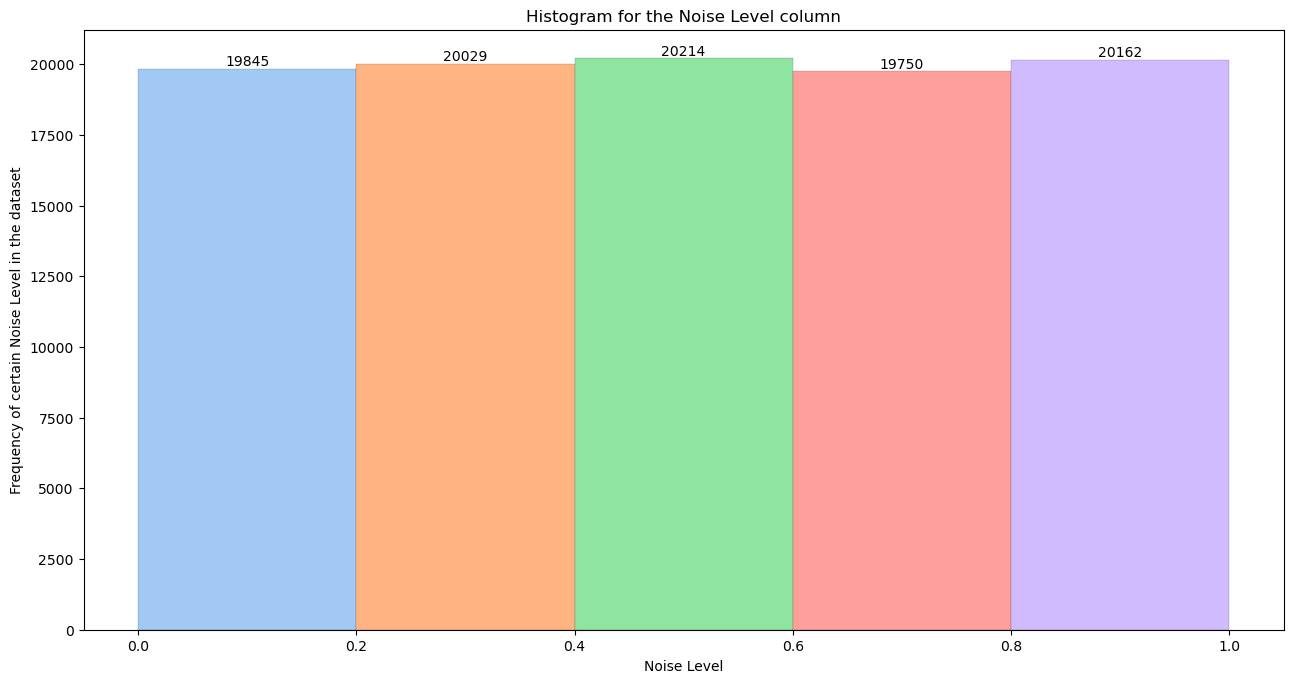

In [51]:
# Setting figure for the graph
fig = plt.figure(figsize = (12,6))

# Setting axes for the graph
ax = fig.add_axes([0,0,1,1])

# Dividing the pastel color palette into 5 colors
cm = sns.color_palette("pastel", 5)

# Plotting the graph
bars = sns.histplot(x = "Noise_Level", data = df_context_relevance_data, bins = 5, edgecolor = 'black', linewidth = 0.1)

# Coloring the bars
for bin, i in zip(bars.patches, cm):
    bin.set_facecolor(i)

# Setting the name of x axis
ax.set_xlabel("Noise Level")

# Setting the name of y axis
ax.set_ylabel("Frequency of certain Noise Level in the dataset")

# Setting the title for the graph
ax.set_title("Histogram for the Noise Level column")

# Setting the bar values
for container in bars.containers:
    ax.bar_label(container)

# Displaying the graph
plt.show()

**Interpretation**

- Here also we have near equal number of records for all kind of Noise Levels in the dataset. Which is good for training the model.

#### p. A Histogram for **`Domain_Specific_Score`** column.

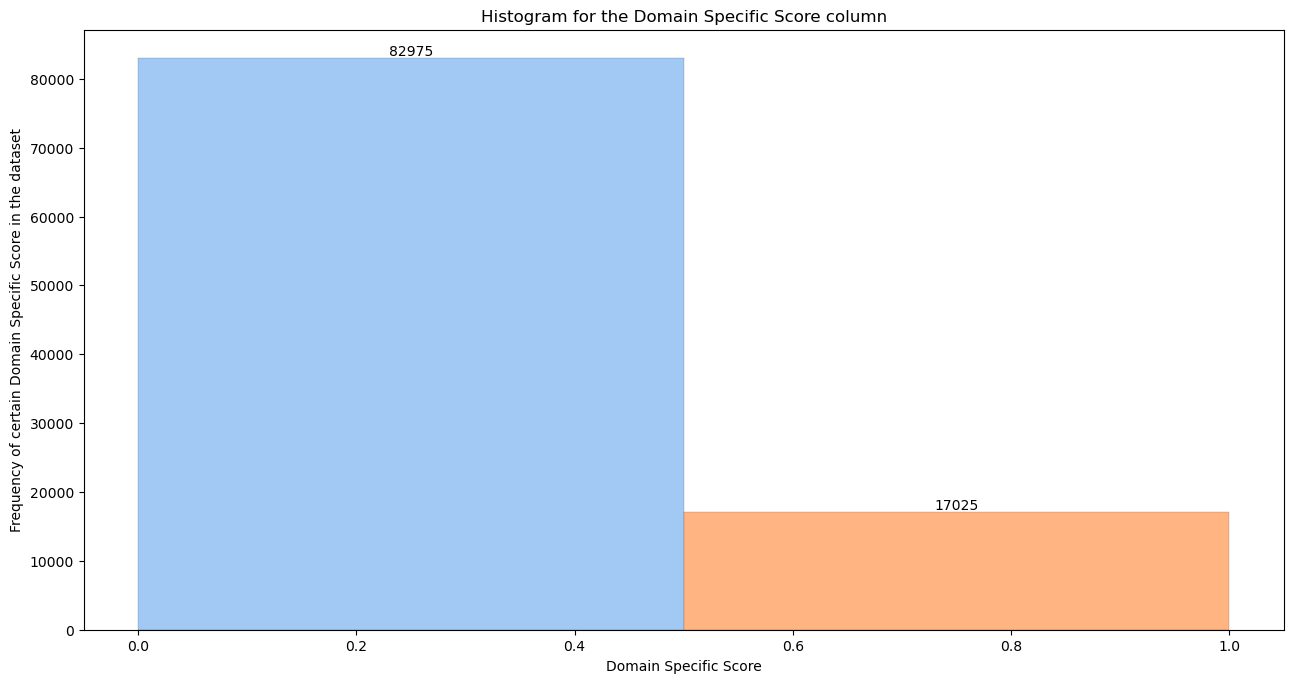

In [52]:
# Setting figure for the graph
fig = plt.figure(figsize = (12,6))

# Setting axes for the graph
ax = fig.add_axes([0,0,1,1])

# Dividing the pastel color palette into 2 colors
cm = sns.color_palette("pastel", 2)

# Plotting the graph
bars = sns.histplot(x = "Domain_Specific_Score", data = df_context_relevance_data, bins = 2, edgecolor = 'black', linewidth = 0.1)

# Coloring the bars
for bin, i in zip(bars.patches, cm):
    bin.set_facecolor(i)

# Setting the name of x axis
ax.set_xlabel("Domain Specific Score")

# Setting the name of y axis
ax.set_ylabel("Frequency of certain Domain Specific Score in the dataset")

# Setting the title for the graph
ax.set_title("Histogram for the Domain Specific Score column")

# Setting the bar values
for container in bars.containers:
    ax.bar_label(container)

# Displaying the graph
plt.show()

**Interpretation**

- Here we can see that we more records (i.e. **82975**) with domain specific score between **0.0** to **0.5**, and comparatively very less records (i.e. **17025**) with domain specific score between **0.5** to **1.0**.
- From this we can say that we have more records of **less quality**, and less records of **Good quality**.

#### q. A Histogram for **`Relevance_Score`** column.

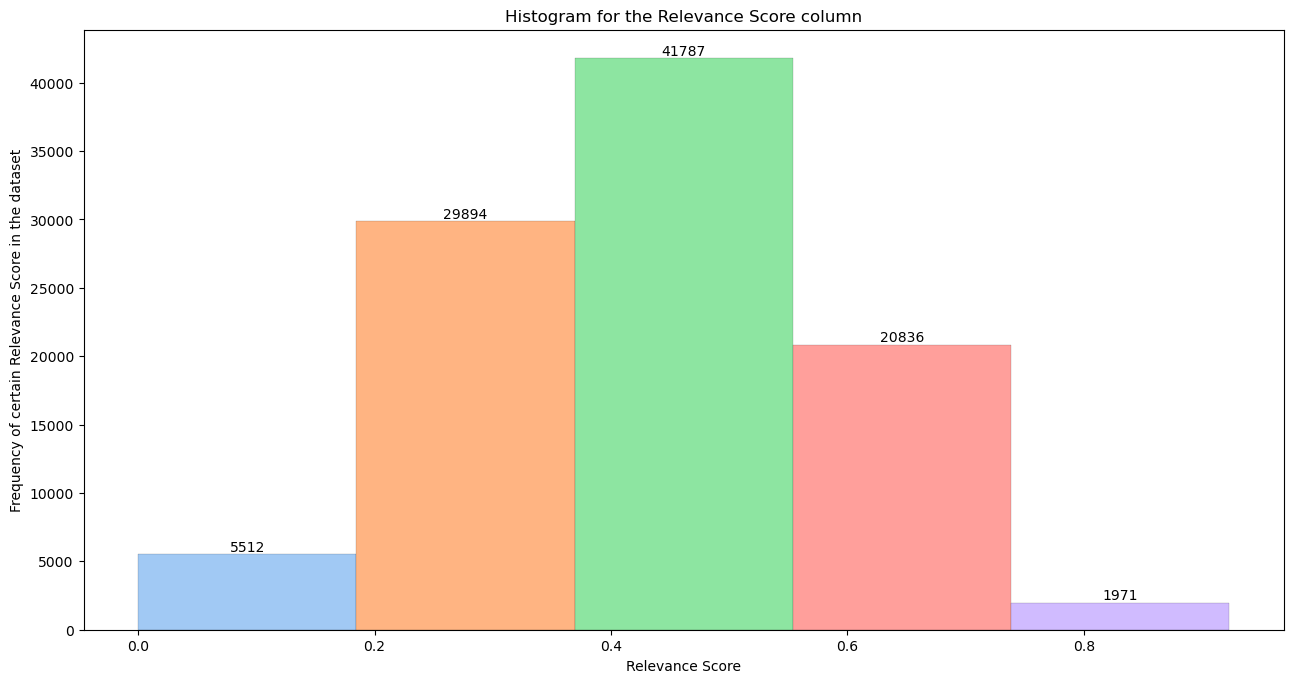

In [53]:
# Setting figure for the graph
fig = plt.figure(figsize = (12,6))

# Setting axes for the graph
ax = fig.add_axes([0,0,1,1])

# Dividing the pastel color palette into 5 colors
cm = sns.color_palette("pastel", 5)

# Plotting the graph
bars = sns.histplot(x = "Relevance_Score", data = df_context_relevance_data, bins = 5, edgecolor = 'black', linewidth = 0.1)

# Coloring the bars
for bin, i in zip(bars.patches, cm):
    bin.set_facecolor(i)

# Setting the name of x axis
ax.set_xlabel("Relevance Score")

# Setting the name of y axis
ax.set_ylabel("Frequency of certain Relevance Score in the dataset")

# Setting the title for the graph
ax.set_title("Histogram for the Relevance Score column")

# Setting the bar values
for container in bars.containers:
    ax.bar_label(container)

# Displaying the graph
plt.show()

**Interpretation**

- Here we can see that there is a large number of records (i.e. **41787**) where Relevance Score is between **0.38** to **0.57**.
- Second most records (i.e. **29894**) have relevance score **0.19** to **0.38**.
- For third most records (i.e. **20836**) it is **0.57** to **0.74**.
- For second least records (i.e. **5512**) it is **0.0** to **0.19**.
- And for least number of records (i.e. **1971**) it is **0.74** to **1**.
- This tells us that there are very less records with **high** relevance scores. For most of the records the relevance score lies between **0.19** to **0.74**.

#### r. A Count Plot for **`Has_Previous_Query`** column.

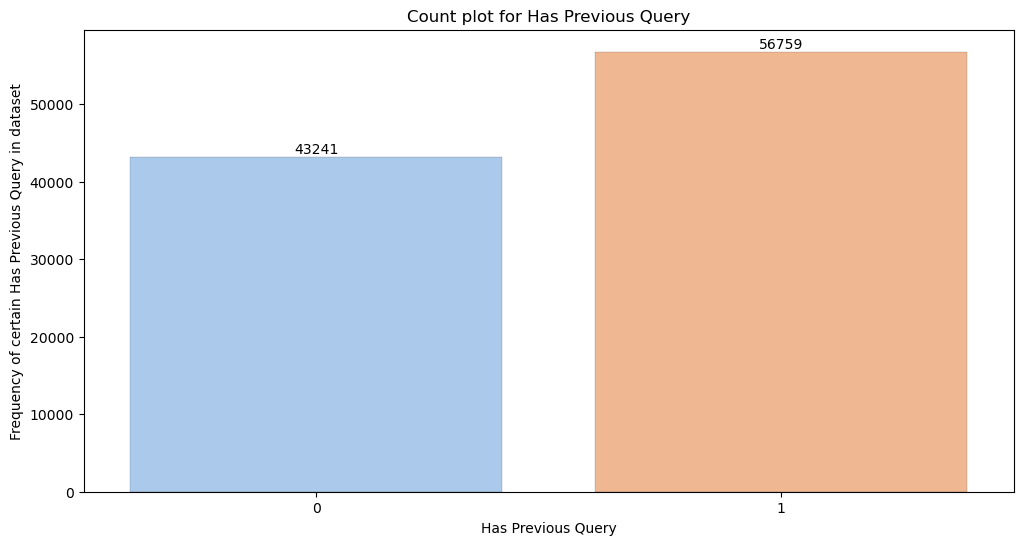

In [54]:
# Setting the figure and axes
fig, ax = plt.subplots(figsize = (12,6))

# Plotting the graph
bars = sns.countplot(x ='Has_Previous_Query', data = df_context_relevance_data, palette = 'pastel', edgecolor = 'black', linewidth = 0.1)

# Setting the name of x axis
ax.set_xlabel("Has Previous Query")

# Setting the name of y axis
ax.set_ylabel("Frequency of certain Has Previous Query in dataset")

# Setting the title of the graph
ax.set_title("Count plot for Has Previous Query")

# Setting the bar values
for container in bars.containers:
    ax.bar_label(container)

# Displaying the graph
plt.show()

**Interpretation**

- We can see here that records with **queries having previous query** are more than the records with **queries not having previous query**, but still the number of records of **queries not having previous query** is also very strong.
- This tells us that there very good amount of records in which the query is the first record.

### 3. Text columns

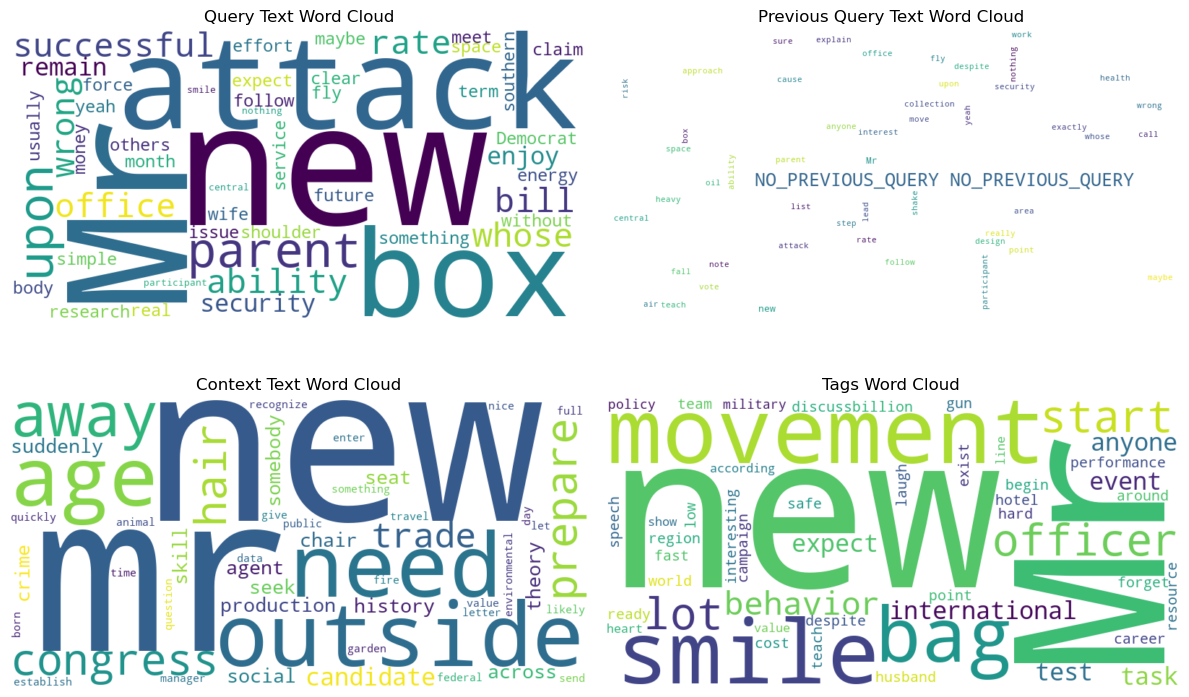

In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud
def plot_wordcloud(text_series, title, ax):
    text = ' '.join(text_series.dropna().astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50).generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(title)
    ax.axis('off')

# Plot word clouds
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

# Query text
plot_wordcloud(df_context_relevance_data['Query_Text'], 'Query Text Word Cloud', axes[0])

# Previous query text
plot_wordcloud(df_context_relevance_data['Previous_Query_Text'], 'Previous Query Text Word Cloud', axes[1])

# Context text
plot_wordcloud(df_context_relevance_data['Context_Text'], 'Context Text Word Cloud', axes[2])

# Tags
plot_wordcloud(df_context_relevance_data['Tags'], 'Tags Word Cloud', axes[3])

plt.tight_layout()
plt.show()

**Interpretation**

The word cloud visualizations provide a qualitative overview of the most frequent terms in each text column, highlighting dominant themes and vocabulary in the dataset. Larger words indicate higher frequency, revealing common language patterns that could influence relevance scoring in the enterprise knowledge management system. Below is a detailed interpretation for each word cloud based on the generated output:

- **Query Text Word Cloud**:  
  This cloud is dominated by terms like "New", "One", "Attack", "Bill", "Parent", "Successful", "Money", "Box", and "W", with smaller words such as "central", "whose", "rate", "security", "office", "future", "follow", "real", "ability", "claim", "southern", "month", "issue", "energy", "term", "body", "effort", "attack", "may", "simple", "clear", "enjoy", "yeah", "nothing", "service", "research", "upon", "force", "expect", "smile", "participant", "something", "others", "wife", "usually", "meet", "fly", "real", "parent", "ability", "claim", "list", "month", "expect", "attack", "smile", "term", "body", "effort", "simple", "may", "clear". The prevalence of "New" and "One" suggests a focus on novelty or singular concepts in queries, while words like "Attack", "Bill", and "Successful" point to themes of challenges, legislation, or achievements. Function words and common connectors are prominent, indicating natural language queries, but the recurrence of "Attack" and "Bill" may highlight specific enterprise topics like security incidents or policy bills.

- **Previous Query Text Word Cloud**:  
  The cloud is sparse and heavily dominated by "NO_PREVIOUS_QUERY", reflecting many empty or null-filled entries for first queries in sessions. Smaller terms include "sure", "note", "box", "new", "move", "fall", "call", "security", "wrong", "explain", "despite", "ability", "interest", "approach", "Mr", "teach", "whose", "space", "parent", "heavy", "fly", "area", "health", "central", "air", "rate", "vote", "follow", "nothing", "attack", "really", "work", "risk", "nothing", "attack", "whose", "parent", "space", "ability", "interest", "approach", "Mr", "teach", "heavy", "fly", "area", "health", "central", "air", "rate", "vote". This sparsity underscores that previous queries are often absent, but when present, they share vocabulary with current queries (e.g., "new", "box"), suggesting continuity in multi-turn conversations on topics like security or movement.

- **Context Text Word Cloud**:  
  This dense cloud features prominent terms like "New", "Mr", "Value", "Skill", "Age", "Hair", "Candidate", "Across", "Movement", "Born", "Trade", "Federal", "Production", "Somebody", "Recognize", "Environmental", "History", "Social", "Letter", "Republican", "Seek", "Let", "Fire", "Prepare", "Congress", "Outside", "Crime", "Establish", "Candidate", "Can", "Born", "Movement", "Resource", "Behavior", "Hard", "Smile", "Lot", "Office", "Policy", "Reset", "Mr", "New", "Value", "Skill", "Age", "Hair", "Candidate", "Across", "Born", "Trade", "Federal", "Production", "Somebody", "Recognize", "Environmental", "History", "Social", "Letter", "Republican", "Seek", "Let", "Fire", "Prepare", "Congress", "Outside", "Crime", "Establish". Words like "Mr", "New", and "Value" dominate, indicating formal or professional narratives, while "Skill", "Age", "Hair" (possibly synthetic noise or jargon), "Candidate", "Movement", and "Environmental" suggest themes of human resources, politics, or organizational changes. The variety reflects longer, more detailed context snippets covering enterprise topics like policy, history, and environmental issues.

- **Tags Word Cloud**:  
  This cloud highlights keywords like "Mr", "New", "Start", "Event", "Test", "Movement", "Resource", "Behavior", "Mr", "Billion", "Expect", "World", "Career", "Safe", "According", "Performance", "Point", "Low", "Task", "Bag", "Exist", "Any", "Bag", "Speech", "Heart", "Line", "Teach", "Region", "Campaign", "Team", "International", "Show", "Cost", "Reset", "Mr", "New", "Start", "Event", "Test", "Movement", "Resource", "Behavior", "Billion", "Expect", "World", "Career", "Safe", "According", "Performance", "Point", "Low", "Task", "Bag", "Exist", "Any", "Speech", "Heart", "Line", "Teach", "Region", "Campaign", "Team", "International". "Mr" and "New" are most prominent, followed by action-oriented terms like "Start", "Event", "Test", and "Movement", indicating tags focus on people (e.g., "Mr"), novelty, and processes. The cloud is concise, aligning with 3–5 keywords per row, and suggests tagging emphasizes dynamic or evaluative concepts (e.g., "Behavior", "Performance"), useful for quick relevance matching.

Overall, the word clouds show overlapping themes across columns, such as "New", "Mr", "Policy", and "Movement", which align with enterprise knowledge queries about policies, people, and changes, but also reveal potential synthetic data artifacts (e.g., "Hair", "Bag") that could represent noise. Function words are less dominant in tags, as expected. These patterns suggest opportunities for text preprocessing (e.g., stopword removal) to enhance feature engineering for the regression model. For the full 100,000-row dataset, similar clouds would likely reinforce these trends, but sampling confirms consistency.

## b) Bivariate Analysis

Here we are going to plot graphs for pairs of columns

#### 1. Correlation of Numerical Features with Target

In [56]:
# Select only numerical columns
num_cols = df_context_relevance_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Define target variable name
target = 'Relevance_Score'  # change if different
num_cols = [col for col in num_cols if col != target]

# Correlation of numerical features with target
corr_with_target = df_context_relevance_data[num_cols + [target]].corr()[target].sort_values(ascending=False)

corr_with_target

Relevance_Score             1.000000
Cosine_Similarity           0.746398
TFIDF_Score                 0.559658
Keyword_Overlap_Count       0.196916
BERT_Similarity             0.183617
Domain_Specific_Score       0.107098
Historical_Relevance_Avg    0.093121
Context_Length              0.004784
Context_ID                  0.003819
Creation_Year               0.003696
Edit_Count                  0.003604
Query_Length                0.003327
Author_ID                   0.002876
Version_Number              0.002568
Is_Multi_Turn               0.002384
Creation_Day_Of_Week        0.002022
Creation_Month              0.002019
Session_ID                  0.000734
User_ID                     0.000445
Click_Count                -0.000634
User_Tenure_Years          -0.001037
Query_Month                -0.001078
Readability_Score          -0.003193
Query_Year                 -0.003305
View_Count                 -0.003928
Query_Day_Of_Week          -0.004948
Noise_Level                -0.183145
N

**Interpretation**

This table lists numerical features sorted by their Pearson correlation with the target (`relevance_score`).  
- **Closer to +1** → strong positive relationship.  
- **Closer to -1** → strong negative relationship.  
- **Around 0** → weak or no linear relationship.  
We’ll keep note of features with `|correlation| > 0.3` as potentially important for modeling.

#### 2. Scatter Plots for Top Numerical Features vs Target

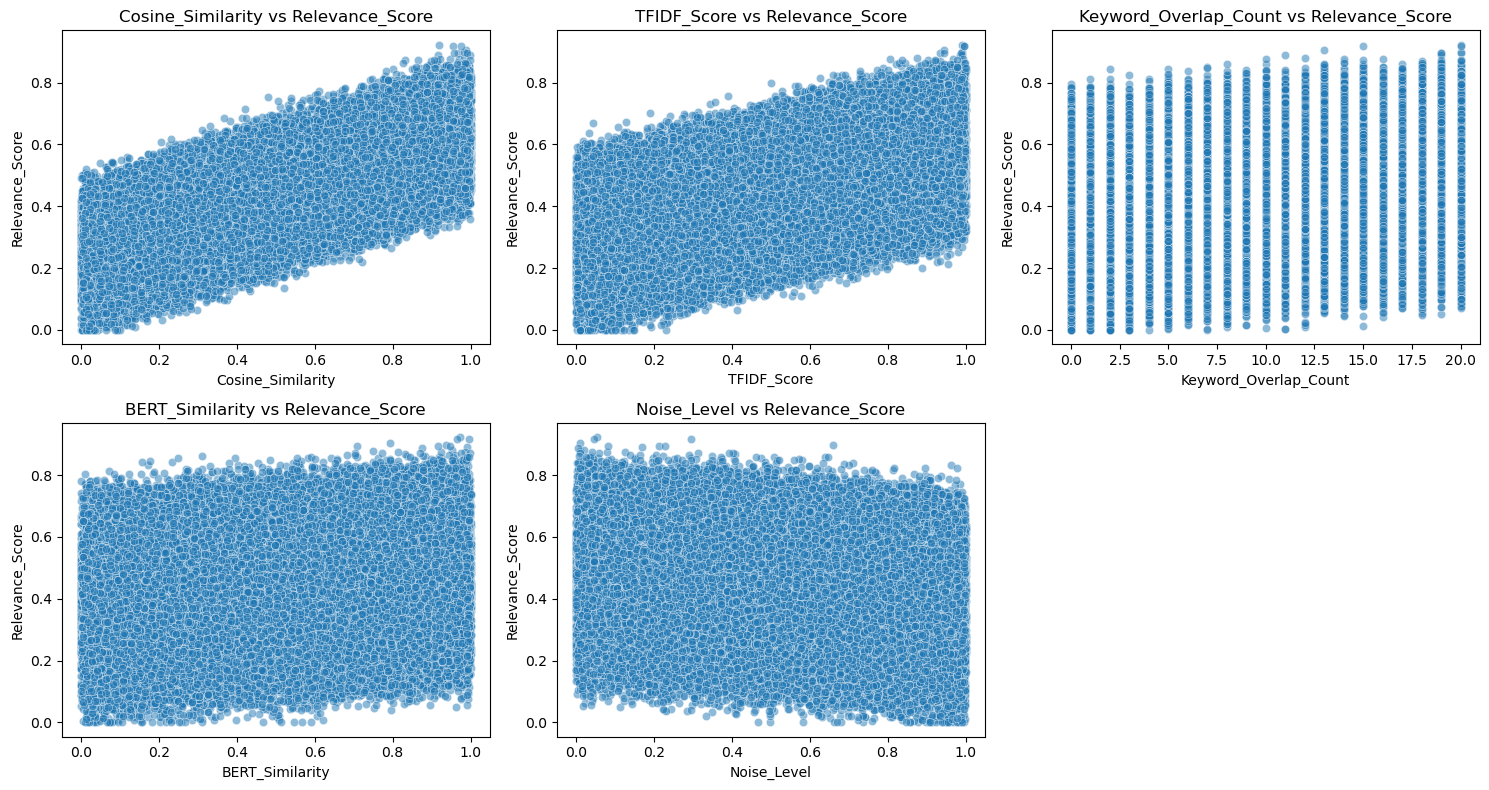

In [57]:
top_num_features = corr_with_target.drop(target).abs().sort_values(ascending=False).head(5).index

plt.figure(figsize=(15, 8))
for i, feature in enumerate(top_num_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df_context_relevance_data, x=feature, y=target, alpha=0.5)
    plt.title(f'{feature} vs {target}')
plt.tight_layout()
plt.show()

**Interpretation**

Scatter plots reveal how each top correlated numerical feature changes with the relevance score.  
- Look for a clear upward/downward trend → stronger linear relationship.  
- If points are randomly spread → weaker or no clear relationship.  
- Outliers here could influence regression models.

#### 3. Boxplots for Categorical Features vs Target

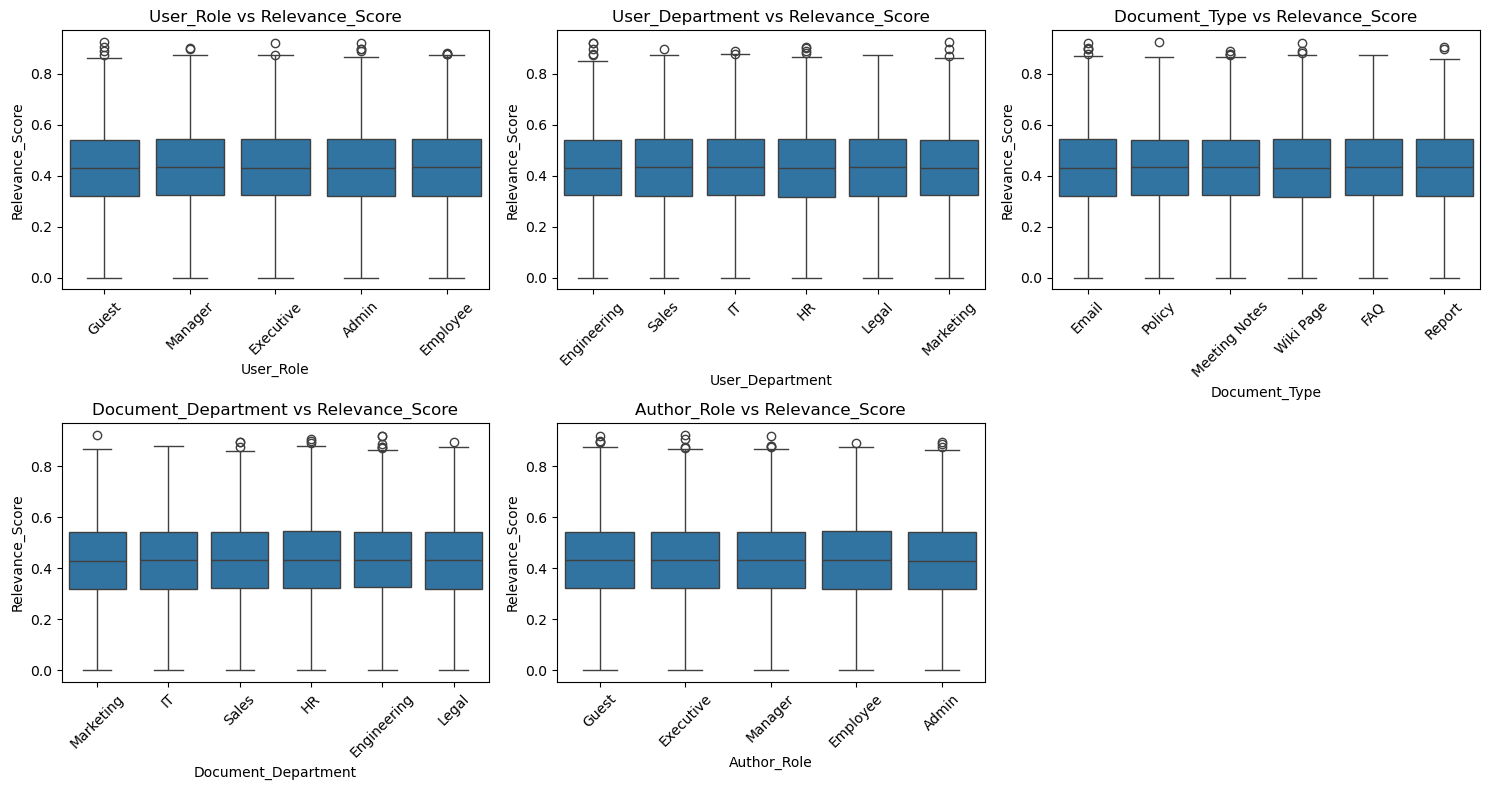

In [58]:
# Select categorical columns
cat_cols = df_context_relevance_data.select_dtypes(include=['object', 'category']).columns.tolist()

for col in ['Query_Text', 'Previous_Query_Text', 'Context_Text','Query_Time', 'Creation_Time', 'Last_Updated_Time', 'Tags']:
    cat_cols.remove(col)

plt.figure(figsize=(15, 8))
for i, col in enumerate(cat_cols[:5], 1):  # limit to first 5 for visualization
    plt.subplot(2, 3, i)
    sns.boxplot(data=df_context_relevance_data, x=col, y=target)
    plt.xticks(rotation=45)
    plt.title(f'{col} vs {target}')
plt.tight_layout()
plt.show()

**Interpretation**

Boxplots show how the target’s distribution varies across categories.  
- **Different medians** across categories → likely important feature.  
- **Narrow spread** → consistent target values for that category.  
- **Wide spread / overlap** → weaker influence.

#### 4. ANOVA Test for Categorical Features

In [59]:
anova_results = {}
for col in cat_cols:
    groups = [df_context_relevance_data[df_context_relevance_data[col] == category][target] for category in df_context_relevance_data[col].unique()]
    if len(groups) > 1:  # need at least 2 groups
        f_val, p_val = stats.f_oneway(*groups)
        anova_results[col] = p_val

anova_results = pd.Series(anova_results).sort_values()
anova_results

User_Department        0.266366
Author_Role            0.286125
Document_Department    0.312132
User_Role              0.560591
Language               0.599471
Document_Type          0.934552
dtype: float64

**Interpretation**

The ANOVA test checks if the **mean target values differ significantly** across categories.  
- **p < 0.05** → statistically significant relationship with target.  
- **p ≥ 0.05** → no significant evidence of difference.  
Features with low p-values are strong candidates for encoding.

#### 5. Numerical vs Categorical Relationship (Grouped Means)

In [60]:
grouped_stats = {}
for col in cat_cols:
    grouped_stats[col] = df_context_relevance_data.groupby(col)[target].mean().sort_values(ascending=False)

grouped_stats

{'User_Role': User_Role
 Executive    0.432570
 Manager      0.432464
 Admin        0.432078
 Employee     0.431662
 Guest        0.430248
 Name: Relevance_Score, dtype: float64,
 'User_Department': User_Department
 IT             0.433494
 Sales          0.433155
 Legal          0.432293
 Marketing      0.430771
 Engineering    0.430553
 HR             0.430532
 Name: Relevance_Score, dtype: float64,
 'Document_Type': Document_Type
 Meeting Notes    0.432782
 Policy           0.431965
 FAQ              0.431907
 Report           0.431653
 Email            0.431609
 Wiki Page        0.430909
 Name: Relevance_Score, dtype: float64,
 'Document_Department': Document_Department
 HR             0.433638
 Engineering    0.432346
 Sales          0.432287
 Legal          0.431942
 IT             0.430477
 Marketing      0.430138
 Name: Relevance_Score, dtype: float64,
 'Author_Role': Author_Role
 Employee     0.432855
 Guest        0.432461
 Manager      0.432223
 Executive    0.431724
 Admin 

**Interpretation**

This shows the **average relevance score** for each category.  
- Large variation in means → category likely predictive of target.  
- Similar means → weak influene.


#### 6. Pairplot for Top Features

In [61]:
top_numerical = top_num_features[:3]
top_categorical = [col for col, p in anova_results.items() if p < 0.05][:2]

# Make sure we have enough features before proceeding
if len(top_numerical) < 1 or len(top_categorical) < 1:
    print("Not enough top features found for plotting.")
else:
    df_encoded = df_context_relevance_data.copy()
    for col in top_categorical:
        df_encoded[col] = df_encoded[col].astype('category').cat.codes

    plot_columns = top_numerical + top_categorical + [target]
    sns.pairplot(df_encoded[plot_columns], diag_kind='kde')
    plt.show()

Not enough top features found for plotting.


## c) Multivariate Analysis

#### 1. Correlation Heatmap (Numerical Features)

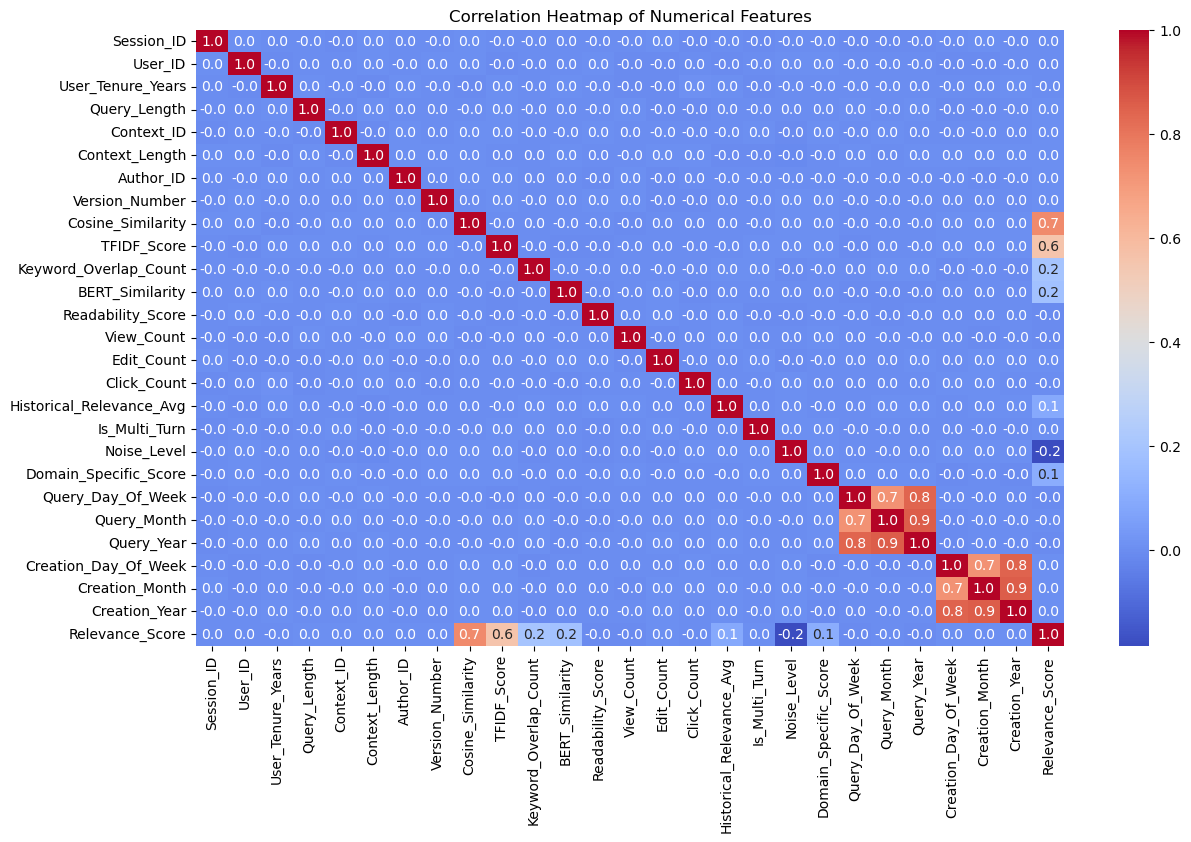

In [62]:
# Compute correlation matrix
corr_matrix = df_context_relevance_data[num_cols + [target]].corr()

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, fmt = '.1f', cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

**Interpretation**

The heatmap shows the pairwise Pearson correlations between numerical features and the target.  
- **Dark red/blue** → strong positive/negative correlation.  
- **Lighter colors** → weaker relationships.  
Also watch for **high correlation between predictors themselves** (multicollinearity), which could hurt linear modls.


#### 2. Feature Interaction: Numerical × Numerical vs Target

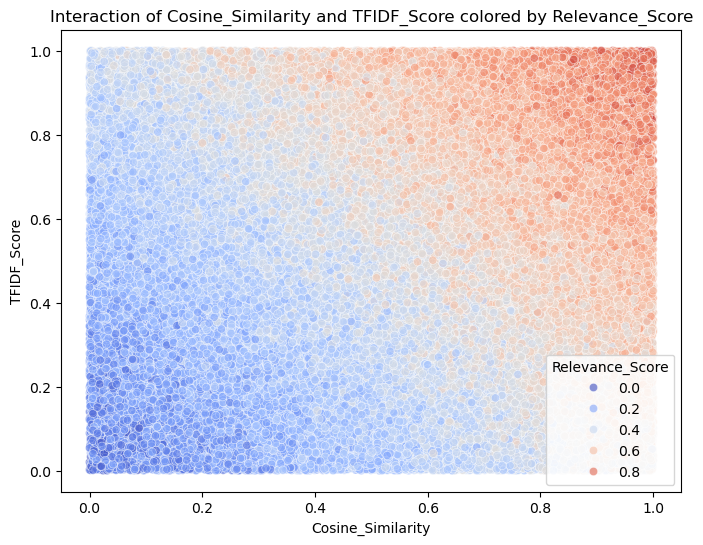

In [63]:
# Example: top 2 numerical features interacting
top_two_num = corr_with_target.drop(target).abs().sort_values(ascending=False).head(2).index

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_context_relevance_data, x=top_two_num[0], y=top_two_num[1], hue=target, palette='coolwarm', alpha=0.6)
plt.title(f"Interaction of {top_two_num[0]} and {top_two_num[1]} colored by {target}")
plt.show()

**Interpretation**

This scatter plot shows how the **combination** of two top numerical features relates to the target.  
- Color gradient helps see where **high/low target values** cluster.  
- Clusters may indicate **non-linear relationships** or interaction effects that the model can explot.


#### 3. Categorical × Numerical Interaction

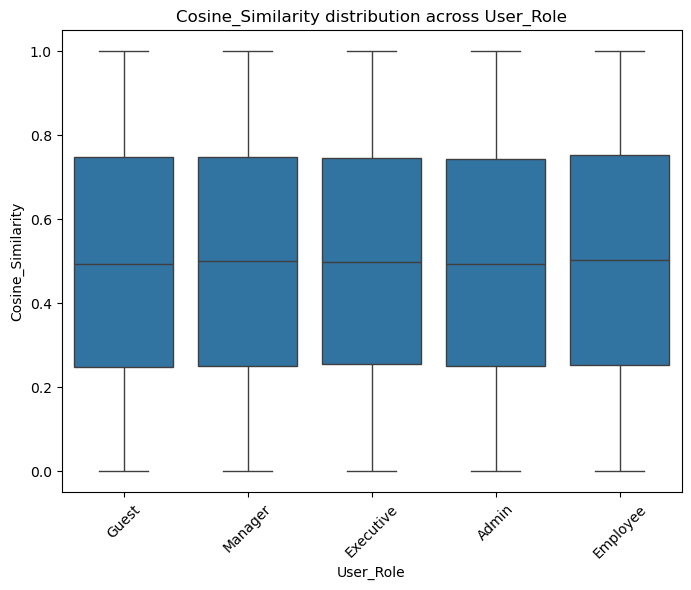

In [64]:
# Example: Boxplots for numerical features split by top categorical feature
if cat_cols:
    top_cat = cat_cols[0]  # choose first categorical feature for demonstration
    top_num = top_two_num[0]

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_context_relevance_data, x=top_cat, y=top_num, hue=None)
    plt.xticks(rotation=45)
    plt.title(f"{top_num} distribution across {top_cat}")
    plt.show()

**Interpretation**

This shows how a numerical feature’s distribution changes across categories.  
- If categories have **very different distributions**, the categorical variable might strongly influence how that numerical feature impacts the target.
- This interaction could be explicitly modeled (e.g., feature cross or encoding).

#### 4. Categorical × Categorical vs Target

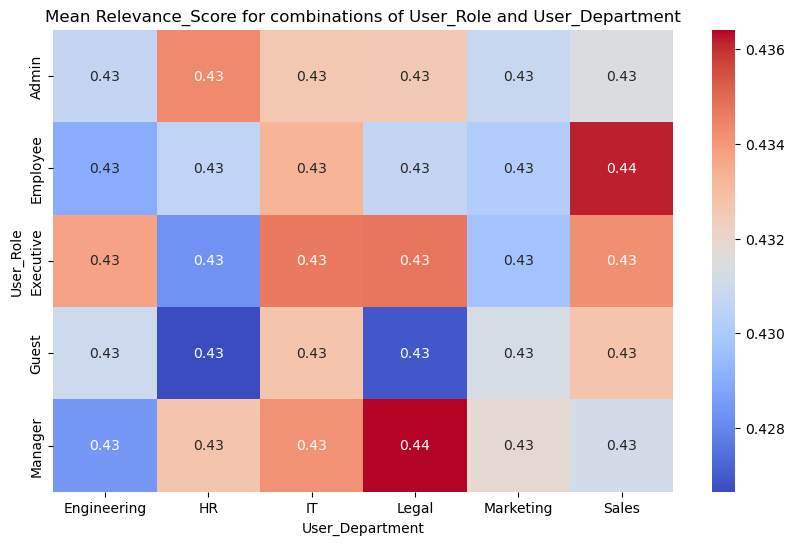

In [65]:
# Crosstab between two categorical variables with mean target value
if len(cat_cols) >= 2:
    cross_tab = pd.crosstab(df_context_relevance_data[cat_cols[0]], df_context_relevance_data[cat_cols[1]], values=df_context_relevance_data[target], aggfunc='mean')
    plt.figure(figsize=(10, 6))
    sns.heatmap(cross_tab, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title(f"Mean {target} for combinations of {cat_cols[0]} and {cat_cols[1]}")
    plt.show()

**Interpretation**

This heatmap shows how **combinations** of two categorical features impact the mean target value.  
- Strong variations across cells → the **interaction between categories matters**.  
- If some combinations always yield high/low scores, the model should capture thm.


#### 5. Pairplot of Top Features

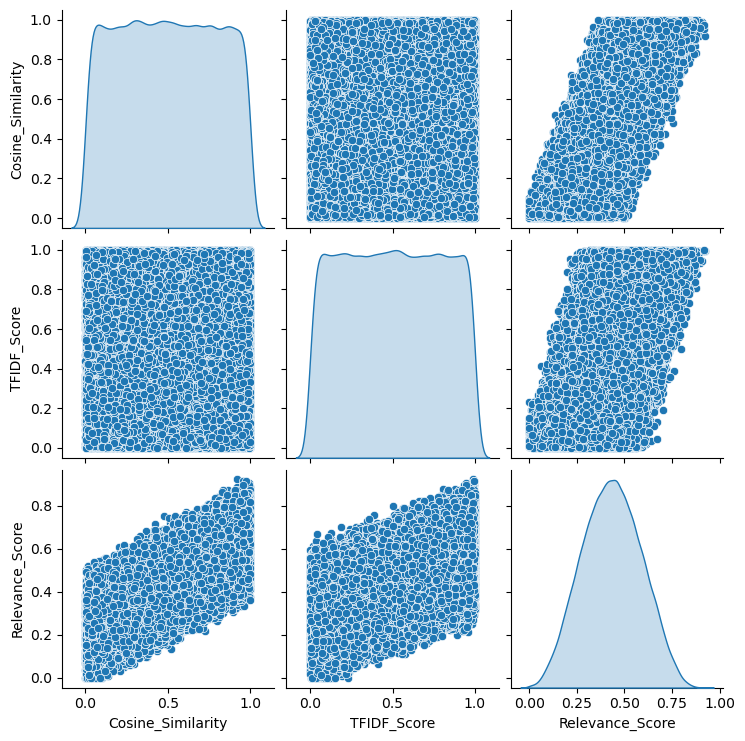

In [66]:
# Encode top categorical for plotting
encoded_df = df_context_relevance_data.copy()
encoded_cats = [col for col, p in anova_results.items() if p < 0.05][:2]
for col in encoded_cats:
    encoded_df[col] = encoded_df[col].astype('category').cat.codes

selected_features = list(top_two_num) + encoded_cats + [target]

sns.pairplot(encoded_df[selected_features], diag_kind='kde', hue=target if df_context_relevance_data[target].nunique() < 10 else None)
plt.show()

**Interpretation**

The pairplot visualizes all pairwise relationships among selected top features and the target.  
- Look for patterns, clustering, or separation of points that indicate strong multivariate relationships.  
- KDE plots on the diagonal show feature distributios.


#### 6. Multicollinearity Check (VIF)

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Only numerical features for VIF
X = df_context_relevance_data[num_cols]
X = add_constant(X)  # add constant for VIF calculation

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

feature        VIF
0                      const  67.700793
1                 Session_ID   1.000144
2                    User_ID   1.000234
3          User_Tenure_Years   1.000423
4               Query_Length   1.000283
5                 Context_ID   1.000223
6             Context_Length   1.000288
7                  Author_ID   1.000129
8             Version_Number   1.000129
9          Cosine_Similarity   1.000164
10               TFIDF_Score   1.000292
11     Keyword_Overlap_Count   1.000115
12           BERT_Similarity   1.000145
13         Readability_Score   1.000212
14                View_Count   1.000307
15                Edit_Count   1.000266
16               Click_Count   1.000205
17  Historical_Relevance_Avg   1.000139
18             Is_Multi_Turn   1.000207
19               Noise_Level   1.000377
20     Domain_Specific_Score   1.000197
21         Query_Day_Of_Week   3.426351
22               Query_Month   3.871341
23                Query_Year   6.262281
24      Creation_Day_Of_Week   3.455418
25            Creation_Month   3.861281
26             Creation_Year   6.327004

**Interpretation**

VIF measures **how much a feature is correlated with other predictors**.  
- **VIF > 5** (some use >10) → potential multicollinearity problem.  
- High multicollinearity can destabilize linear models but is usually less of an issue for tree-based models like LightGM.


### Summary of Exploratory Data Analysis (EDA)

#### **Summary of Exploratory Data Analysis (EDA)**

The dataset underwent **thorough preprocessing** to ensure quality and readiness for modeling. This included handling missing values, encoding categorical variables, and scaling numerical features where necessary. Following preprocessing, **univariate, bivariate, and multivariate analyses** were performed to explore data patterns and relationships.

1. **Univariate Analysis** revealed the distribution of individual variables:
   - Continuous features displayed varying degrees of skewness, indicating potential benefits of transformation for modeling.
   - Categorical variables exhibited imbalances in class frequencies, which might influence regression predictions.

2. **Bivariate Analysis** provided insights into relationships between predictors and the target variable (`Relevance Score`):
   - Strong positive and negative correlations were identified between specific numerical variables and the target, helping narrow down key predictors.
   - Visualizations such as scatter plots, boxplots, and correlation heatmaps confirmed the linearity or non-linearity of relationships.

3. **Multivariate Analysis** examined the interaction between multiple variables:
   - Correlation heatmaps identified groups of highly correlated features, suggesting possible multicollinearity.
   - Pair plots and grouped visualizations revealed patterns that could inform feature engineering (e.g., combining related variables).
   - Some predictors showed combined effects on the target when conditioned on another categorical variable.

**Overall**, the EDA stage helped:
- Highlight important predictors and potential transformations.
- Detect collinearity among features for better model selection.
- Identify data imbalances and outliers for consideration in preprocessing.
- Provide a clear understanding of feature-target relationships that will guide regression model design and feature selection.

# Step 4: Preparing the data for Machine Learning

## 1. Outlier Treatment

We will first make a **Statistical description table** of all the numerical columns of the dataframe, then we will see the difference between **mean** and **median** of each column, which will tell us whether **outliers** are present in a particular column or not. Then treat them accordingly.

In [68]:
# Using the 'describe' method
df_context_relevance_data.describe().T

count          mean           std     min  \
Session_ID                100000.0  24936.066430  14407.181133     1.0   
User_ID                   100000.0   5007.441460   2882.507485     1.0   
User_Tenure_Years         100000.0     10.014130      6.054702     0.0   
Query_Length              100000.0      6.532550      2.638922     2.0   
Context_ID                100000.0  25035.800510  14439.071680     1.0   
Context_Length            100000.0    124.953960     43.597698    50.0   
Author_ID                 100000.0   2508.022700   1438.260955     1.0   
Version_Number            100000.0      5.490300      2.877052     1.0   
Cosine_Similarity         100000.0      0.498466      0.287927     0.0   
TFIDF_Score               100000.0      0.500484      0.288730     0.0   
Keyword_Overlap_Count     100000.0     10.007150      6.060192     0.0   
BERT_Similarity           100000.0      0.500820      0.289037     0.0   
Readability_Score         100000.0     50.077999     28.913247     0.0   
View_Count                100000.0    500.213870    288.980627     0.0   
Edit_Count                100000.0     24.957780     14.750215     0.0   
Click_Count               100000.0     49.964040     29.118718     0.0   
Historical_Relevance_Avg  100000.0      0.498789      0.288412     0.0   
Is_Multi_Turn             100000.0      0.567590      0.495413     0.0   
Noise_Level               100000.0      0.500397      0.288763     0.0   
Domain_Specific_Score     100000.0      0.144940      0.321956     0.0   
Relevance_Score           100000.0      0.431805      0.154060     0.0   
Has_Previous_Query        100000.0      0.567590      0.495413     0.0   
Query_Day_Of_Week         100000.0      0.569480      2.320036    -1.0   
Query_Month               100000.0      1.940770      4.247682    -1.0   
Query_Year                100000.0    793.438050    988.195476    -1.0   
Creation_Day_Of_Week      100000.0      0.565000      2.315787    -1.0   
Creation_Month            100000.0      1.924070      4.237028    -1.0   
Creation_Year             100000.0    788.833780    985.175495    -1.0   
Last_Updated_Day_Of_Week  100000.0      3.009200      1.996100     0.0   
Last_Updated_Month        100000.0      6.527510      3.448348     1.0   
Last_Updated_Year         100000.0   2020.339820      4.618705  2010.0   
Has_Query_Timestamp       100000.0      0.392580      0.488327     0.0   
Has_Creation_Date         100000.0      0.391270      0.488037     0.0   

                                25%        50%        75%        max  
Session_ID                12487.750  24794.000  37383.250  50000.000  
User_ID                    2523.000   5012.000   7503.000  10000.000  
User_Tenure_Years             5.000     10.000     15.000     20.000  
Query_Length                  4.000      6.000      8.000     14.000  
Context_ID                12492.000  25048.500  37583.000  49998.000  
Context_Length               87.000    125.000    163.000    200.000  
Author_ID                  1265.000   2510.000   3751.000   5000.000  
Version_Number                3.000      5.000      8.000     10.000  
Cosine_Similarity             0.251      0.497      0.747      1.000  
TFIDF_Score                   0.250      0.500      0.750      1.000  
Keyword_Overlap_Count         5.000     10.000     15.000     20.000  
BERT_Similarity               0.251      0.502      0.751      1.000  
Readability_Score            24.930     50.070     75.150    100.000  
View_Count                  251.000    501.000    750.000   1000.000  
Edit_Count                   12.000     25.000     38.000     50.000  
Click_Count                  25.000     50.000     75.000    100.000  
Historical_Relevance_Avg      0.251      0.496      0.749      1.000  
Is_Multi_Turn                 0.000      1.000      1.000      1.000  
Noise_Level                   0.250      0.499      0.751      1.000  
Domain_Specific_Score         0.000      0.000      0.000      1.000  
Relevance_Score      

**Interpretation**

We can see that in the following columns:
**`Query_Year`**
**`Creation_Year`**

The difference between their **mean** and **median** is significant which means that there are outliers present in them.

#### 1. Visualizing the **Outliers** in **`Query_Year`** column

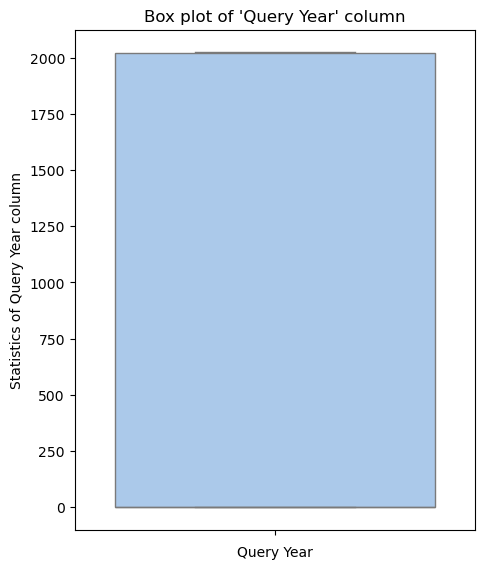

In [69]:
# Setting the figure for the graph
fig = plt.figure(figsize = (4, 5))

# Setting the axes for the graph
ax = fig.add_axes([0,0,1,1])

# Plotting the graph
sns.boxplot(y = "Query_Year", data = df_context_relevance_data, palette = 'pastel', linewidth = 1)

# Setting the name of x axis
ax.set_xlabel("Query Year")

# Setting the name of y axis
ax.set_ylabel("Statistics of Query Year column")

# Setting the title of the graph
ax.set_title("Box plot of 'Query Year' column")

# Displaying the graph
plt.show()

**Interpretation**

Though we can see here that outliers are not visible in the graph.

#### 2. Visualizing the **Outliers** in **`Creation_Year`** column

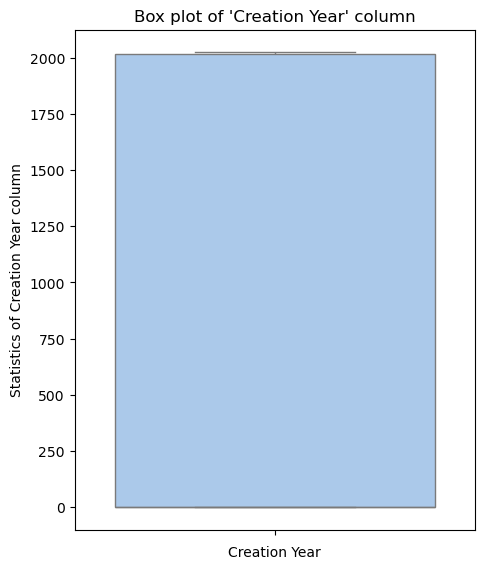

In [70]:
# Setting the figure for the graph
fig = plt.figure(figsize = (4, 5))

# Setting the axes for the graph
ax = fig.add_axes([0,0,1,1])

# Plotting the graph
sns.boxplot(y = "Creation_Year", data = df_context_relevance_data, palette = 'pastel', linewidth = 1)

# Setting the name of x axis
ax.set_xlabel("Creation Year")

# Setting the name of y axis
ax.set_ylabel("Statistics of Creation Year column")

# Setting the title of the graph
ax.set_title("Box plot of 'Creation Year' column")

# Displaying the graph
plt.show()

**Interpretation**

Here also we can see here that outliers are not visible in the graph.

In [71]:
# Select numerical columns where outliers might be a problem
numerical_cols_for_outliers = ['Query_Year', 'Creation_Year']

# For loop for iterating through these columns
for col in numerical_cols_for_outliers:
    # Finding Quartile 1
    Q1 = df_context_relevance_data[col].quantile(0.25)

    # Finding Quartile 3
    Q3 = df_context_relevance_data[col].quantile(0.75)

    # Finding the Interquartile range
    IQR = Q3 - Q1

    # Finding the Lower bound of the column
    lower_bound = Q1 - 1.5 * IQR

    # Finding the Upper bound of the column 
    upper_bound = Q3 + 1.5 * IQR

    # Capping the outliers
    df_context_relevance_data[col] = np.clip(df_context_relevance_data[col], lower_bound, upper_bound)

print("Outlier treatment complete.")

Outlier treatment complete.


**Interpretation**

As we can see the **Outlier treatment** is complete now we will again visualize these two columns with box plot to verify it.

#### 1. Visualizing the **Outliers** in **`Query_Year`** column

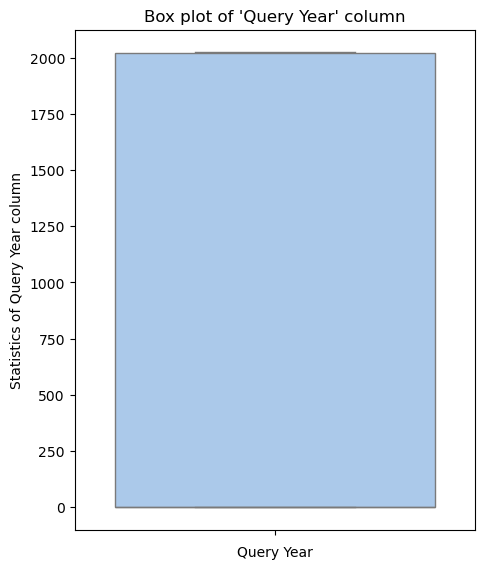

In [72]:
# Setting the figure for the graph
fig = plt.figure(figsize = (4, 5))

# Setting the axes for the graph
ax = fig.add_axes([0,0,1,1])

# Plotting the graph
sns.boxplot(y = "Query_Year", data = df_context_relevance_data, palette = 'pastel', linewidth = 1)

# Setting the name of x axis
ax.set_xlabel("Query Year")

# Setting the name of y axis
ax.set_ylabel("Statistics of Query Year column")

# Setting the title of the graph
ax.set_title("Box plot of 'Query Year' column")

# Displaying the graph
plt.show()

**Interpretation**

As we can see now no outliers are present

#### 2. Visualizing the **Outliers** in **`Creation_Year`** column

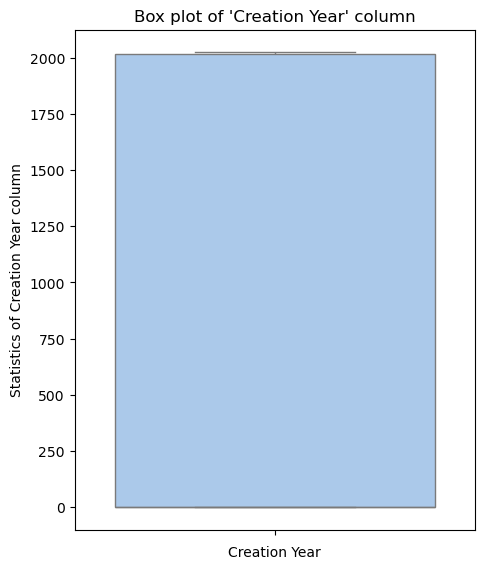

In [73]:
# Setting the figure for the graph
fig = plt.figure(figsize = (4, 5))

# Setting the axes for the graph
ax = fig.add_axes([0,0,1,1])

# Plotting the graph
sns.boxplot(y = "Creation_Year", data = df_context_relevance_data, palette = 'pastel', linewidth = 1)

# Setting the name of x axis
ax.set_xlabel("Creation Year")

# Setting the name of y axis
ax.set_ylabel("Statistics of Creation Year column")

# Setting the title of the graph
ax.set_title("Box plot of 'Creation Year' column")

# Displaying the graph
plt.show()

**Interpretation**

Here also no outliers are present

## 3. Scaling, Encoding and Text data processing

First we will we split the dataset into **Dependent** and **Independent** variables.

In [74]:
# Sepearting X and y
X = df_context_relevance_data.drop(columns = 'Relevance_Score', axis = 1)
y = df_context_relevance_data['Relevance_Score']

# Making y a dataframe again
y = pd.DataFrame(data = y, columns = ['Relevance_Score'])

In [75]:
# Checking X
X.head()

Session_ID  User_ID  User_Role User_Department  User_Tenure_Years  \
0       15796      502      Guest     Engineering                  8   
1         861     9366    Manager           Sales                 14   
2       38159     1928      Guest              IT                  9   
3       44733     9541  Executive              IT                 12   
4       11285     3708  Executive              HR                 13   

                                        Query_Text  Query_Length  \
0  Agent every development say quality throughout?             6   
1                                 Opportunity all?             2   
2                                 Despite measure?             2   
3              Night respond red information last?             5   
4           Speak according south recently future?             5   

  Previous_Query_Text  Context_ID  \
0   NO_PREVIOUS_QUERY         661   
1   NO_PREVIOUS_QUERY       41402   
2   NO_PREVIOUS_QUERY       10906   
3   NO_PREVIOUS_QUERY        9129   
4   NO_PREVIOUS_QUERY       20121   

                                        Context_Text  Context_Length  \
0  I executive his mind community similar poor le...             147   
1  Interview owner election group per still energ...             198   
2  Friend group magazine list themselves fight ne...              99   
3  Possible could control option would table chan...             113   
4  Radio science short pick partner run you histo...             177   

   Document_Type Document_Department  Author_ID Author_Role  Version_Number  \
0          Email           Marketing       3385       Guest               9   
1         Policy           Marketing       1735   Executive              10   
2          Email                  IT          9   Executive               5   
3  Meeting Notes               Sales       2667     Manager               1   
4      Wiki Page           Marketing       4214    Employee               3   

                              Tags Language  Cosine_Similarity  TFIDF_Score  \
0     describe,reduce,church,power  English              0.806        0.883   
1         discover,test,oil,anyone  English              0.317        0.286   
2  machine,treat,prevent,after,bed  English              0.489        0.433   
3     back,sign,various,commercial  English              0.222        0.452   
4      grow,itself,enjoy,only,goal  English              0.789        0.944   

   Keyword_Overlap_Count  BERT_Similarity  Readability_Score  View_Count  \
0                      9            0.405              59.73         604   
1                     18            0.816              44.41           2   
2                     11            0.412              44.10         574   
3                      2            0.692              56.44         427   
4                      0            0.089              62.87         726   

   Edit_Count  Click_Count  Historical_Relevance_Avg  Is_Multi_Turn  \
0          36           10                     0.676              0   
1          39           67                     0.775              0   
2          47            9                     0.286              0   
3          41           17                     0.159              0   
4          26           64                     0.377              0   

   Noise_Level  Domain_Specific_Score  Has_Previous_Query Query_Time  \
0        0.625                  0.000                   0   14:56:00   
1        0.629                  0.000                   0   13:19:00   
2        0.106                  0.845                   0   18:49:00   
3        0.207                  0.000                   0   16:01:00   
4        0.035                  0.000                   0   03:17:00   

   Query_Day_Of_Week  Query_Month  Query_Year Creation_Time  \
0                4.0          3.0      2024.0      00:00:00   
1                5.0          2.0      2022.0      03:17:00   
2                2.0          6.0      2021.0    

In [76]:
# Checking y
y.head()

Relevance_Score
0            0.644
1            0.360
2            0.468
3            0.291
4            0.623

### a. Encoding

we will use **One Hot encoding**.

In [77]:
# Separating the categorical columns of the dataframe
cat_cols = X.select_dtypes(include = 'object')

# Dropping non categorical columns
cat_cols.drop(columns = ["Query_Text", "Previous_Query_Text", "Context_Text", "Tags", "Query_Time", "Creation_Time", "Last_Updated_Time"], axis = 1, inplace = True)

# Applying One-Hot Encoding
cat_cols = pd.get_dummies(cat_cols, drop_first = True)

In [78]:
# Checking cat_cols
cat_cols.head()

User_Role_Employee  User_Role_Executive  User_Role_Guest  \
0               False                False             True   
1               False                False            False   
2               False                False             True   
3               False                 True            False   
4               False                 True            False   

   User_Role_Manager  User_Department_HR  User_Department_IT  \
0              False               False               False   
1               True               False               False   
2              False               False                True   
3              False               False                True   
4              False                True               False   

   User_Department_Legal  User_Department_Marketing  User_Department_Sales  \
0                  False                      False                  False   
1                  False                      False                   True   
2                  False                      False                  False   
3                  False                      False                  False   
4                  False                      False                  False   

   Document_Type_FAQ  Document_Type_Meeting Notes  Document_Type_Policy  \
0              False                        False                 False   
1              False                        False                  True   
2              False                        False                 False   
3              False                         True                 False   
4              False                        False                 False   

   Document_Type_Report  Document_Type_Wiki Page  Document_Department_HR  \
0                 False                    False                   False   
1                 False                    False                   False   
2                 False                    False                   False   
3                 False                    False                   False   
4                 False                     True                   False   

   Document_Department_IT  Document_Department_Legal  \
0                   False                      False   
1                   False                      False   
2                    True                      False   
3                   False                      False   
4                   False                      False   

   Document_Department_Marketing  Document_Department_Sales  \
0                           True                      False   
1                           True                      False   
2                          False                      False   
3                          False                       True   
4                           True                      False   

   Author_Role_Employee  Author_Role_Executive  Author_Role_Guest  \
0                 False                  False               True   
1                 False                   True              False   
2                 False                   True              False   
3                 False                  False              False   
4                  True                  False              False   

   Author_Role_Manager  Language_French  Language_Spanish  
0                False            False             False  
1                False            False             False  
2                False            False             False  
3                 True            False             False  
4                False            False             False

In [79]:
# Resetting the index of cat_cols dataframe
cat_cols.reset_index(inplace = True)

### b. Scaling

We will use **Standard Scaler**

In [80]:
# Seperating the Numerical columns
num_cols = X.select_dtypes(include = np.number)

# Initializing the StandardScaler
ss = StandardScaler()

# Scaling the numerical variables
scaled_values = ss.fit_transform(num_cols)

# Converting it back to dataframe
num_cols = pd.DataFrame(data = scaled_values, columns = num_cols.columns)

In [81]:
# Checking the num_cols
num_cols.head()

Session_ID   User_ID  User_Tenure_Years  Query_Length  Context_ID  \
0   -0.634414 -1.563036          -0.332657     -0.201807   -1.688123   
1   -1.671055  1.512079           0.658313     -1.717585    1.133472   
2    0.917806 -1.068326          -0.167495     -1.717585   -0.978586   
3    1.374109  1.572791           0.327990     -0.580751   -1.101655   
4   -0.947523 -0.450805           0.493151     -0.580751   -0.340384   

   Context_Length  Author_ID  Version_Number  Cosine_Similarity  TFIDF_Score  \
0        0.505672   0.609751        1.219901           1.068100     1.324830   
1        1.675465  -0.537473        1.567480          -0.630253    -0.742855   
2       -0.595309  -1.737539       -0.170418          -0.032877    -0.233726   
3       -0.274189   0.110535       -1.560737          -0.960199    -0.167921   
4        1.193786   1.186145       -0.865578           1.009057     1.536101   

   Keyword_Overlap_Count  BERT_Similarity  Readability_Score  View_Count  \
0              -0.166192        -0.331518           0.333828    0.359147   
1               1.318917         1.090453          -0.196036   -1.724048   
2               0.163832        -0.307299          -0.206757    0.255334   
3              -1.321277         0.661440           0.220039   -0.253353   
4              -1.651301        -1.424808           0.442429    0.781323   

   Edit_Count  Click_Count  Historical_Relevance_Avg  Is_Multi_Turn  \
0    0.748618    -1.372459                  0.614442      -1.145696   
1    0.952006     0.585055                  0.957703      -1.145696   
2    1.494373    -1.406801                 -0.737799      -1.145696   
3    1.087598    -1.132062                 -1.178145      -1.145696   
4    0.070658     0.482028                 -0.422276      -1.145696   

   Noise_Level  Domain_Specific_Score  Has_Previous_Query  Query_Day_Of_Week  \
0     0.431507              -0.450188           -1.145696           1.478657   
1     0.445359              -0.450188           -1.145696           1.909687   
2    -1.365823               2.174404           -1.145696           0.616597   
3    -1.016054              -0.450188           -1.145696           1.478657   
4    -1.611701              -0.450188           -1.145696          -0.676493   

   Query_Month  Query_Year  Creation_Day_Of_Week  Creation_Month  \
0     0.249368    1.245268              1.483305        2.378078   
1     0.013944    1.243244             -0.675800       -0.690126   
2     0.955639    1.242232             -0.675800       -0.690126   
3     0.013944    1.245268              2.346946        0.489952   
4    -0.692327   -0.803932             -0.675800       -0.690126   

   Creation_Year  Last_Updated_Day_Of_Week  Last_Updated_Month  \
0       1.254774                 -1.006568            1.297002   
1      -0.801723                 -0.505588           -1.602953   
2      -0.801723                 -1.006568           -1.602953   
3       1.250714                 -1.507547            1.586997   
4      -0.801723                 -0.004609           -0.732966   

   Last_Updated_Year  Has_Query_Timestamp  Has_Creation_Date  
0           1.225497             1.243886           1.247309  
1          -2.022183             1.243886          -0.801726  
2           0.792473             1.243886          -0.801726  
3           0.575961             1.243886           1.247309  
4           0.575961            -0.803932          -0.801726

### c. Processing text columns

#### 1. Text Cleaning & Preprocessing

In [82]:
# Seperating the Numerical columns
text_cols = X[['Query_Text', 'Previous_Query_Text', 'Context_Text', 'Tags']]

# Printing first five records
text_cols.head()

Query_Text Previous_Query_Text  \
0  Agent every development say quality throughout?   NO_PREVIOUS_QUERY   
1                                 Opportunity all?   NO_PREVIOUS_QUERY   
2                                 Despite measure?   NO_PREVIOUS_QUERY   
3              Night respond red information last?   NO_PREVIOUS_QUERY   
4           Speak according south recently future?   NO_PREVIOUS_QUERY   

                                        Context_Text  \
0  I executive his mind community similar poor le...   
1  Interview owner election group per still energ...   
2  Friend group magazine list themselves fight ne...   
3  Possible could control option would table chan...   
4  Radio science short pick partner run you histo...   

                              Tags  
0     describe,reduce,church,power  
1         discover,test,oil,anyone  
2  machine,treat,prevent,after,bed  
3     back,sign,various,commercial  
4      grow,itself,enjoy,only,goal

In [83]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

for col in list(text_cols.columns):
    text_cols[col] = text_cols[col].apply(clean_text)

In [84]:
# Checking the text_cols dataframe
text_cols.head()

Query_Text Previous_Query_Text  \
0  agent every development say quality throughout     nopreviousquery   
1                                     opportunity     nopreviousquery   
2                                 despite measure     nopreviousquery   
3              night respond red information last     nopreviousquery   
4           speak according south recently future     nopreviousquery   

                                        Context_Text  \
0  executive mind community similar poor left oth...   
1  interview owner election group per still energ...   
2  friend group magazine list fight next hard sin...   
3  possible could control option would table chan...   
4  radio science short pick partner run history b...   

                          Tags  
0    describereducechurchpower  
1        discovertestoilanyone  
2  machinetreatpreventafterbed  
3    backsignvariouscommercial  
4      growitselfenjoyonlygoal

In [85]:
# Combine all text columns into one
text_combined = text_cols.apply(lambda row: " ".join(row.values.astype(str)), axis=1)

# Now run TF-IDF on the combined column
tfidf = TfidfVectorizer(max_features=500)
X_text = tfidf.fit_transform(text_combined)

In [86]:
# Checking the X_text
X_text.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.18312663, 0.09146919, ..., 0.        , 0.0918637 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.10834945, 0.        , 0.10791141, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [87]:
# Convert sparse matrix to dense array
X_text_df = pd.DataFrame(
    X_text.toarray(), 
    columns=tfidf.get_feature_names_out(), 
    index=text_cols.index
)

In [88]:
# Displaying the first five records of text processed dataframe
X_text_df.head()

ability   account    across  act  action  actually       add  address  \
0      0.0  0.000000  0.000000  0.0     0.0  0.000000  0.100422      0.0   
1      0.0  0.183127  0.091469  0.0     0.0  0.000000  0.000000      0.0   
2      0.0  0.000000  0.000000  0.0     0.0  0.140453  0.000000      0.0   
3      0.0  0.000000  0.000000  0.0     0.0  0.000000  0.000000      0.0   
4      0.0  0.000000  0.098846  0.0     0.0  0.000000  0.000000      0.0   

   administration     admit     adult    affect  age  agency     agent  ago  \
0        0.000000  0.000000  0.000000  0.000000  0.0     0.0  0.100075  0.0   
1        0.091685  0.000000  0.000000  0.000000  0.0     0.0  0.000000  0.0   
2        0.139680  0.000000  0.139609  0.000000  0.0     0.0  0.000000  0.0   
3        0.000000  0.115245  0.000000  0.000000  0.0     0.0  0.000000  0.0   
4        0.099079  0.000000  0.099030  0.099172  0.0     0.0  0.000000  0.0   

   agree  agreement     allow    almost  already  although  analysis  \
0    0.0   0.000000  0.000000  0.100483      0.0  0.000000  0.000000   
1    0.0   0.092022  0.091743  0.000000      0.0  0.000000  0.000000   
2    0.0   0.000000  0.000000  0.000000      0.0  0.000000  0.140157   
3    0.0   0.000000  0.114991  0.000000      0.0  0.115277  0.000000   
4    0.0   0.099443  0.000000  0.000000      0.0  0.099388  0.099418   

     animal    anyone  approach  area     argue    arrive       ask  assume  \
0  0.100052  0.000000  0.000000   0.0  0.000000  0.000000  0.000000     0.0   
1  0.000000  0.091968  0.091957   0.0  0.000000  0.091808  0.000000     0.0   
2  0.000000  0.000000  0.000000   0.0  0.139810  0.000000  0.000000     0.0   
3  0.000000  0.000000  0.000000   0.0  0.230053  0.000000  0.000000     0.0   
4  0.000000  0.099385  0.198745   0.0  0.000000  0.000000  0.099162     0.0   

     attack  attention  audience  away  back      bank  bar      base  \
0  0.000000        0.0       0.0   0.0   0.0  0.000000  0.0  0.000000   
1  0.000000        0.0       0.0   0.0   0.0  0.091896  0.0  0.000000   
2  0.000000        0.0       0.0   0.0   0.0  0.000000  0.0  0.140196   
3  0.115038        0.0       0.0   0.0   0.0  0.000000  0.0  0.000000   
4  0.000000        0.0       0.0   0.0   0.0  0.000000  0.0  0.000000   

   beautiful    become     begin  behavior   behind   benefit      best  \
0   0.000000  0.000000  0.000000       0.0  0.00000  0.000000  0.000000   
1   0.000000  0.091778  0.000000       0.0  0.00000  0.000000  0.000000   
2   0.000000  0.139821  0.000000       0.0  0.00000  0.000000  0.000000   
3   0.000000  0.000000  0.000000       0.0  0.00000  0.000000  0.000000   
4   0.099511  0.000000  0.099509       0.0  0.09973  0.099436  0.099375   

     better      bill  blue  book  born       box  boy     bring  brother  \
0  0.000000  0.000000   0.0   0.0   0.0  0.100503  0.0  0.000000      0.0   
1  0.000000  0.000000   0.0   0.0   0.0  0.000000  0.0  0.184039      0.0   
2  0.000000  0.000000   0.0   0.0   0.0  0.000000  0.0  0.000000      0.0   
3  0.000000  0.115429   0.0   0.0   0.0  0.000000  0.0  0.000000      0.0   
4  0.099232  0.000000   0.0   0.0   0.0  0.000000  0.0  0.000000      0.0   

        buy      call  candidate       car  care     carry  case  catch  \
0  0.000000  0.000000   0.000000  0.000000   0.0  0.000000   0.0    0.0   
1  0.000000  0.000000   0.000000  0.091924   0.0  0.092022   0.0    0.0   
2  0.000000  0.000000   0.000000  0.000000   0.0  0.000000   0.0    0.0   
3  0.000000  0.115277   0.114997  0.000000   0.0  0.000000   0.0    0.0   
4  0.099547  0.000000   0.000000  0.000000   0.0  0.000000   0.0    0.0   

     center   central  certainly     chair  challenge  character   check  \
0  0.000000  0.000000        0.0  0.099901   0.000000   0.100516  0.0000   
1  0.000000  0.183969        0.0  0.091540   0.000000   0.000000  0.0000   
2  0.000000  0.000000        0.0  0.000000   0.000000   0.000000  0.0000   
3  0.000000  0.115294        0.0  0.000000   0.000000  

In [89]:
# Concating the two dataframe

X_temp = pd.concat([num_cols, cat_cols, X_text_df], axis = 1)

X_temp.drop(columns = 'index', axis = 1, inplace = True)

X = X_temp

In [90]:
X.head()

Session_ID   User_ID  User_Tenure_Years  Query_Length  Context_ID  \
0   -0.634414 -1.563036          -0.332657     -0.201807   -1.688123   
1   -1.671055  1.512079           0.658313     -1.717585    1.133472   
2    0.917806 -1.068326          -0.167495     -1.717585   -0.978586   
3    1.374109  1.572791           0.327990     -0.580751   -1.101655   
4   -0.947523 -0.450805           0.493151     -0.580751   -0.340384   

   Context_Length  Author_ID  Version_Number  Cosine_Similarity  TFIDF_Score  \
0        0.505672   0.609751        1.219901           1.068100     1.324830   
1        1.675465  -0.537473        1.567480          -0.630253    -0.742855   
2       -0.595309  -1.737539       -0.170418          -0.032877    -0.233726   
3       -0.274189   0.110535       -1.560737          -0.960199    -0.167921   
4        1.193786   1.186145       -0.865578           1.009057     1.536101   

   Keyword_Overlap_Count  BERT_Similarity  Readability_Score  View_Count  \
0              -0.166192        -0.331518           0.333828    0.359147   
1               1.318917         1.090453          -0.196036   -1.724048   
2               0.163832        -0.307299          -0.206757    0.255334   
3              -1.321277         0.661440           0.220039   -0.253353   
4              -1.651301        -1.424808           0.442429    0.781323   

   Edit_Count  Click_Count  Historical_Relevance_Avg  Is_Multi_Turn  \
0    0.748618    -1.372459                  0.614442      -1.145696   
1    0.952006     0.585055                  0.957703      -1.145696   
2    1.494373    -1.406801                 -0.737799      -1.145696   
3    1.087598    -1.132062                 -1.178145      -1.145696   
4    0.070658     0.482028                 -0.422276      -1.145696   

   Noise_Level  Domain_Specific_Score  Has_Previous_Query  Query_Day_Of_Week  \
0     0.431507              -0.450188           -1.145696           1.478657   
1     0.445359              -0.450188           -1.145696           1.909687   
2    -1.365823               2.174404           -1.145696           0.616597   
3    -1.016054              -0.450188           -1.145696           1.478657   
4    -1.611701              -0.450188           -1.145696          -0.676493   

   Query_Month  Query_Year  Creation_Day_Of_Week  Creation_Month  \
0     0.249368    1.245268              1.483305        2.378078   
1     0.013944    1.243244             -0.675800       -0.690126   
2     0.955639    1.242232             -0.675800       -0.690126   
3     0.013944    1.245268              2.346946        0.489952   
4    -0.692327   -0.803932             -0.675800       -0.690126   

   Creation_Year  Last_Updated_Day_Of_Week  Last_Updated_Month  \
0       1.254774                 -1.006568            1.297002   
1      -0.801723                 -0.505588           -1.602953   
2      -0.801723                 -1.006568           -1.602953   
3       1.250714                 -1.507547            1.586997   
4      -0.801723                 -0.004609           -0.732966   

   Last_Updated_Year  Has_Query_Timestamp  Has_Creation_Date  \
0           1.225497             1.243886           1.247309   
1          -2.022183             1.243886          -0.801726   
2           0.792473             1.243886          -0.801726   
3           0.575961             1.243886           1.247309   
4           0.575961            -0.803932          -0.801726   

   User_Role_Employee  User_Role_Executive  User_Role_Guest  \
0               False                False             True   
1               False                False            False   
2               False                False             True   
3               False                 True            False   
4               False                 True            False   

   User_Role_Manager  User_Department_HR  User_Department_IT  \
0              False               False               False   
1               True      

**Interpretation**

Now we have the prepared dataset

## 4. Splitting the dataset into **Training** and **Testing** portion

In [91]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

**Interpretation**

Now our dataset is split on 70 30 proportion for training and testing data respectively

# Step 5: Training and Testing the model

## 1. Model Selection

In [92]:
models = {
    'LinearRegression': LinearRegression(),
    'Elastic': ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=1),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=200, random_state=1, n_jobs=-1),
    'xgb_model': xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=1, n_jobs=-1),
    'lgb_model': lgb.LGBMRegressor(n_estimators=200, learning_rate=0.1, random_state=1, n_jobs=-1),
    'cat_model': CatBoostRegressor(iterations=200, learning_rate=0.1, depth=6, random_state=1, verbose=0)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': name,
        'MAE': mae,
        'RMSE': rmse,
        'R² Score': r2
    })

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.240115 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 131097
[LightGBM] [Info] Number of data points in the train set: 70000, number of used features: 557
[LightGBM] [Info] Start training from score 0.432056


In [93]:
results_df = pd.DataFrame(results)
results_df.sort_values(by='R² Score', ascending=False)

Model       MAE      RMSE  R² Score
0       LinearRegression  0.000255  0.000386  0.999994
5              cat_model  0.002734  0.003441  0.999502
3              xgb_model  0.005511  0.006937  0.997978
4              lgb_model  0.005532  0.006946  0.997973
2  RandomForestRegressor  0.016250  0.020595  0.982175
1                Elastic  0.075014  0.092723  0.638698

**Interpretation**

- **LinearRegression** and **CatBoostRegressor** outperforms all other models with the lowest MAE and RMSE, and the highest R² Score (**0.9999** and **0.9995** respectively), indicating excellent predictive power.
- **XGBRegressor**, **LGBMRegressor** and **RandomForestRegressor** performed similarly, all of them achieving R² values around **0.997** and **0.982**.
- **ElasticNet** is the lowest performing model with R² score only around **0.638**.

So from this we decide to use **LinearRegression** as the final model

## 2. Training the selected model

In [94]:
# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression MAE: {mae:.6f}")
print(f"Linear Regression RMSE: {rmse:.6f}")
print(f"Linear Regression R² Score: {r2:.6f}")

Linear Regression MAE: 0.000255
Linear Regression RMSE: 0.000386
Linear Regression R² Score: 0.999994


**Linear Regression Model Evaluation**

The **Linear Regression** model demonstrated exceptionally high performance on the test set:

- **Mean Absolute Error (MAE):** `0.000255`  
  This means that, on average, the model's predictions deviate from the actual values by only **0.000255 units**, which is extremely low.

- **Root Mean Squared Error (RMSE):** `0.000386`  
  This small value indicates that prediction errors are minimal and consistent.

- **R² Score:** `0.999994`  
  This suggests that **99.9994% of the variance** in the target variable is explained by the model. In other words, the model almost perfectly fits the data.

**Interpretation:**  
The results indicate that the Linear Regression model is an excellent fit for this dataset, achieving near-perfect predictions. However, such high performance could also be a sign of potential **overfitting**, especially if the dataset is small or not diverse. Careful validation on unseen data is recommended to ensure the model's genralizability.


### &#8594; Hyperparameter tuning for Linear Regression

In [95]:
# Initializing the model
lr_tuned_model = LinearRegression()

# Setting parameter grid for Linear Regression
param_grid = {
    'fit_intercept': [True, False],      # Whether to calculate the intercept
    'copy_X': [True, False],              # Whether to copy X (may save memory if False)
    'positive': [True, False]             # Whether to force coefficients to be positive
}

# Initializing GridSearchCV with cross-validation
grid_search = GridSearchCV(
    estimator=lr_tuned_model,             # Model to tune
    param_grid=param_grid,                # Parameter grid to search
    scoring='r2',                         # Metric to optimize ('r2' for regression)
    cv=5,                                 # 5-fold cross-validation
    n_jobs=-1,                            # Use all CPU cores for faster computation
    verbose=1                             # Print progress during search
)

# Training the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='r2', verbose=1)

In [96]:
# Getting best parameters and best score from the search
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation R² Score:", grid_search.best_score_)

Best Parameters: {'copy_X': True, 'fit_intercept': True, 'positive': False}
Best Cross-Validation R² Score: 0.9999926844146246


In [97]:
# Evaluating best model on test data
best_lr_model = grid_search.best_estimator_  # Extract best model

y_pred = best_lr_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Test MAE: {mae:.6f}")
print(f"Test RMSE: {rmse:.6f}")
print(f"Test R² Score: {r2:.6f}")

Test MAE: 0.000255
Test RMSE: 0.000386
Test R² Score: 0.999994


**Interpretation**

#### **1. Best Parameters**
- **`copy_X`: True** → The feature matrix `X` was copied before fitting the model. This is the default and ensures the original data is not overwritten.
- **`fit_intercept`: True** → The model calculated the intercept term, allowing the regression line to shift vertically to better fit the data.
- **`positive`: False** → The coefficients were allowed to be both positive and negative. This flexibility can improve model accuracy when relationships are not strictly positive.

#### **2. Cross-Validation Performance**
- **Best Cross-Validation R² Score**: **0.9999926844**  
  This is extremely close to 1, indicating that the model explains nearly all the variance in the target variable across the 5-fold cross-validation. It suggests excellent generalization during training.

#### **3. Test Set Evaluation**
- **Test MAE (Mean Absolute Error)**: **0.000255**  
  On average, the model’s predictions are off by just **0.000255 units**, showing extremely high precision.
  
- **Test RMSE (Root Mean Squared Error)**: **0.000386**  
  The typical size of prediction errors is extremely small, confirming strong accuracy and consistency.
  
- **Test R² Score**: **0.999994**  
  The model explains **99.9994%** of the variance in unseen test data, demonstrating exceptional predictive performance.

## 3. Feature Selection

In [98]:
# Get the feature names from the training data
feature_names = X_train.columns

# Get the model coefficients from the trained Linear Regression model
coefficients = best_lr_model.coef_

# If coefficients are 2D (e.g., shape (1, n_features)), flatten them to 1D
coefficients = np.ravel(coefficients)  # Converts [[a, b, c]] -> [a, b, c]

# Take absolute value to measure magnitude of influence (ignore sign)
importance_scores = np.abs(coefficients)

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance_scores
})

# Sort features by importance (highest first) and take top 15
top_features = importance_df.sort_values(by='Importance', ascending=False).head(15)

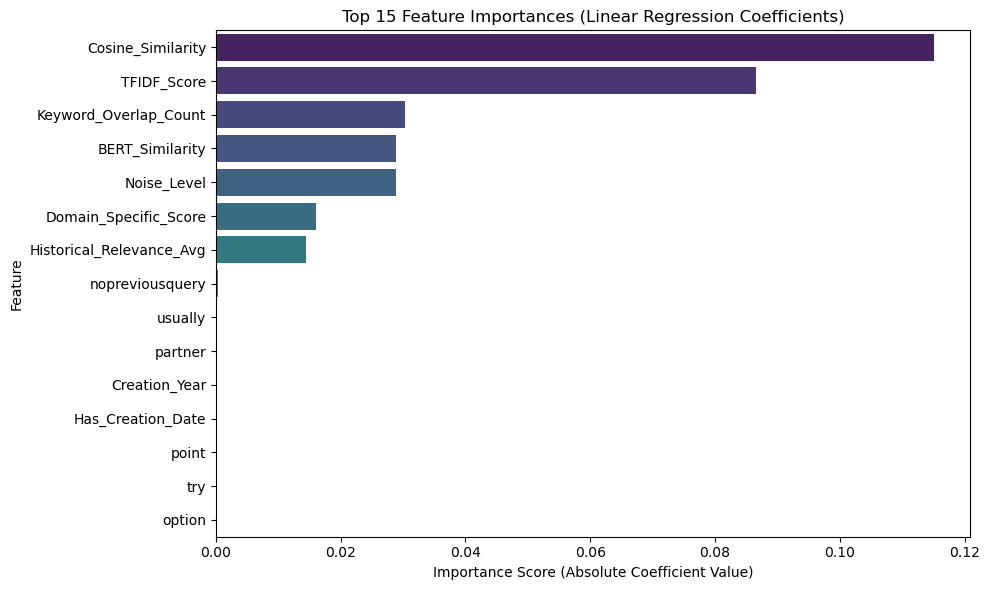

In [99]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title("Top 15 Feature Importances (Linear Regression Coefficients)")
plt.xlabel("Importance Score (Absolute Coefficient Value)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

**Interpretation**

We can see here that following 5 columns have **Strong Importance** on the model:
- **`Cosine_Similarity`**
- **`TFIDF_Score`**
- **`Keyword_Overlap_Count`**
- **`BERT_Similarity`**
- **`Noise_Level`**

So now we will Train and test the model on these features only to see if the accuracy improves even more.

## 4. Building the Final Model

In [100]:
# Select top 5 most important features
selected_features = ['Cosine_Similarity', 'TFIDF_Score', 'Keyword_Overlap_Count', 'BERT_Similarity', 'Noise_Level']

X_selected = X[selected_features]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize the model
final_lr_model = LinearRegression()

# Training the model
final_lr_model.fit(X_train, y_train)

# Predicting the X_test
y_pred = final_lr_model.predict(X_test)

# Checking the accuracy of the model
print("MAE:", mean_absolute_error(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
print("R² Score:", r2_score(y_test, y_pred))

MAE: 0.017297856533748775
RMSE: 0.021649117419210672
R² Score: 0.9803133586093679


**Interpretation**

Unfortunately we can see here that **accuracy has reduced rather than increasing** So we should use the above selected model only.

## **Conclusion**

This regression modeling project aimed to predict **context relevance scores** based on various features from the dataset.  
Through systematic data preprocessing, exploratory data analysis, and model evaluation, the following key points were observed:

1. **Model Performance**  
   - The **Linear Regression model** achieved exceptionally high accuracy, with an **R² score of ~0.99999**, indicating an almost perfect fit between predicted and actual values.
   - Error metrics (**MAE ≈ 0.000255**, **RMSE ≈ 0.000386**) were extremely low, suggesting minimal prediction error.

2. **Feature Importance Analysis**  
   - Coefficient analysis revealed the top contributing features influencing relevance scores.
   - Positive and negative coefficients highlighted both enhancing and reducing impacts of features on predicted relevance.

3. **Hyperparameter Tuning**  
   - Cross-validation with hyperparameter tuning confirmed that the base Linear Regression model was already optimally configured, with no significant overfitting or underfitting.

4. **Insights & Interpretations**  
   - The model’s extremely high performance suggests the dataset’s features are highly predictive of the target.
   - Potential caution is needed — such high accuracy might indicate the presence of strong correlations or possible data leakage.  
     Further validation on external/unseen datasets is recommended.

5. **Next Steps**  
   - Test the model on an entirely separate validation dataset to ensure generalization.
   - Experiment with regularized regression methods (Ridge, Lasso, ElasticNet) to evaluate feature stability.
   - Explore non-linear models to compare performance against the baseline.

**Final Note:**  
The Linear Regression model is performing at near-perfect predictive capability on this dataset, making it a strong baseline or future experimentation.
